# Machine Learning to Predict Airbnb Listing Prices

## Abstract

This report presents a machine learning project aimed at predicting the price of Airbnb listings in Boston, MA, using a dataset from Inside Airbnb. The project involved data cleaning, exploratory data analysis, feature engineering, model selection, and evaluation. The objective was to build a model that accurately predicts the price of a listing based on its characteristics, such as location, amenities, and number of rooms. Various machine learning algorithms and techniques, including linear regression, gradient boosting, and cross-validation, were used, and the final model was evaluated using performance metrics such as mean squared error, mean absolute error, and R-squared. The project also involved hypothesis testing to determine if the model can effectively predict listing prices with a certain degree of accuracy. The findings suggest that the model can reasonably predict the price of a listing based on its attributes, allowing hosts to optimize their pricing strategy and providing policymakers with insights into the impact of Airbnb on local housing markets.

## Overview and Motivation

This project involves building machine learning models to predict the price of Airbnb listings in Boston, MA, based on the characteristics of each listing. The goal of the project is to develop a model that accurately predicts the price of a listing based on factors such as location, amenities, and number of rooms. Short-term rentals through Airbnb have become a popular alternative to traditional hotels for many travelers, but the reasonableness of listing prices in Boston and other cities is often unclear. Policymakers have become increasingly interested in regulating the short-term rental market, while hosts could benefit from optimizing their pricing strategy. Therefore, this project aims to provide a better understanding of the Boston Airbnb market by developing a model that can predict listing prices with a high degree of accuracy. The dataset used for this project is Inside Airbnb's Boston, MA dataset, which includes information such as the location, price, number of bedrooms and bathrooms, reviews, and host information for each listing. This dataset is updated quarterly and includes data on 3,703 Airbnb listings in Boston for the fourth quarter of 2022. This dataset is a valuable resource for stakeholders such as researchers, policymakers, and journalists, who are interested in understanding the dynamics of the Boston Airbnb market. The research question for this project is whether a regression model using the Inside Airbnb's Boston, MA dataset can predict the price of a listing with an accuracy of 80% based on the listing's characteristics. The project involves several steps, including data cleaning, exploratory data analysis, feature engineering, model selection, and evaluation. The models are evaluated based on performance metrics such as mean squared error, mean absolute error, and R-squared. This project is significant as it can provide insights into the reasonableness of Airbnb listing prices in Boston and potentially inform policymakers in their efforts to regulate the short-term rental market. The models can also be used by hosts to optimize their pricing strategy and by prospective tenants to determine the value of a listing.

## Related Work

Numerous machine learning models have been employed to predict Airbnb prices in various cities across the globe. For instance, Gohil and Agrawal utilized a random forest regression model to forecast the price of Airbnb listings in San Francisco, California, based on factors such as location, availability, and amenities offered. Their study achieved a mean absolute error (MAE) of \$59.23, suggesting that their model was 70% accurate in predicting listing prices [1]. Similarly, Chen et al. employed a decision tree model to forecast Airbnb listing prices in Boston, Massachusetts, based on features such as room type, neighborhood, and amenities. Their model achieved an MAE of \$35.64, indicating that it was 75% accurate in predicting listing prices [2]. These studies have contributed valuable insights into the factors that influence Airbnb listing prices and the performance of machine learning models in predicting them. The results indicate that these models can be used to predict listing prices with a considerable degree of accuracy. This information is critical to stakeholders such as Airbnb hosts, potential renters, and property managers who rely on pricing information for optimal decision making.

### References

[1] Gohil, R., & Agrawal, D. (2019). Price Prediction of Airbnb Listings using Machine Learning. In 2019 International Conference on Advances in Computing, Communication Control and Networking (ICACCCN) (pp. 1-5). IEEE.

[2] Chen, Z., Zhou, Y., & Zheng, Y. (2019). Predicting Airbnb Listing Prices Using Machine Learning: A Case Study in Boston. In 2019 IEEE International Conference on Big Data (Big Data) (pp. 4321-4324). IEEE.

## Initial Questions

Since the inception of the project, the primary research question has aimed to determine whether a regression model utilizing Inside Airbnb's Boston, MA dataset can effectively predict the price of a listing with an 80% accuracy rate. To achieve this goal, the models considered various characteristics such as location, amenities offered, and number of rooms. This research question specifically addresses a supervised machine learning problem, namely a regression problem. As the project progressed, new inquiries surfaced, including determining which features had the most significant impact on the price of Airbnb listings in Boston and whether particular neighborhoods or property types had a higher average nightly rate. The project also sought to assess whether the model could predict the price of new, unseen listings with comparable accuracy as seen listings, and whether a notable price difference existed between listings with essential amenities, such as a kitchen, and those without. Throughout the project, some of these questions were resolved, while others remain unanswered. Nonetheless, the primary focus of the project centered on developing an accurate model that could forecast the price of Airbnb listings in Boston.

### Research Question

The current formulation of the research question is as follows: Can a regression model using Inside Airbnb's Boston, MA dataset effectively determine whether the price of a listing is reasonable for both listing and purchasing by predicting its price with an accuracy of 80% by considering characteristics such as location, amenities offered, and number of rooms? This research question answers a supervised machine learning question, specifically a regression problem. The predictor variables of the highest performing model, gradient boosting, include the attributes below. The response variable is the price of the listing.

#### Features

The goal is to build a model that can predict the price of a listing with a high degree of accuracy based on predictor variables like these: 'accommodates', 'beds', 'bathroom_type', 'bathroom_qty', 'bedrooms', 'room_type', 'property_type', 'amenities_qty', 'host_acceptance_rate', 'host_response_time', 'neighbourhood_group', 'latitude', 'host_response_rate', 'has_kitchen', 'host_is_superhost', 'instant_bookable', 'longitude', 'has_coffee_maker', and 'has_essentials'.

#### Hypothesis

- Null: The regression model using Inside Airbnb's Boston, MA dataset cannot determine whether the price of a listing is reasonable for both listing and purchasing by predicting its price with an accuracy of 80% by considering characteristics such as location, amenities offered, and number of rooms.
- Alternative: The regression model using Inside Airbnb's Boston, MA dataset can effectively determine whether the price of a listing is reasonable for both listing and purchasing by predicting its price with an accuracy of 80% by considering characteristics such as location, amenities offered, and number of rooms.

In [4]:
# Import data manipulation libraries
import pandas as pd
import numpy as np

# Import data visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Import data preprocessing libraries
from scipy.stats import linregress
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer

# Import model selection and evaluation libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# Import regression models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor

## Data

[Inside Airbnb's Boston, MA dataset](http://insideairbnb.com/get-the-data) is a collection of data on Airbnb listings in the city of Boston, MA. The data includes information such as the location, price, number of bedrooms and bathrooms, reviews, host information, and other details of each listing. Researchers and policymakers often use this dataset to gain insights into the impact of Airbnb on housing markets and neighborhoods in Boston. The latest datasets were compiled for the fourth quarter of 2022, but the specifics of the data collection process, including the exact timeline, are not publicly disclosed. Data is updated quarterly, providing a snapshot of the market over the past quarter, and is available for download on the Inside Airbnb website. The sample size of Inside Airbnb's Boston, MA dataset can vary, as the data is periodically updated to reflect changes in the market. The most recent dataset for listings made during the fourth quarter of 2022 includes information on exactly 3,703 Airbnb listings in Boston, MA. This dataset is a valuable resource for anyone looking to gain a deeper understanding of the short-term rental market in Boston. It serves a wide range of stakeholders, including researchers, policymakers, and journalists, who are interested in the dynamics of the Boston Airbnb market. However, it is important to note that the data is self-reported by hosts, so it may not be completely accurate. Also, the dataset only spans a quarter-year, so it may not entirely reflect the current state of the market. The data was initially cleaned by removing unnecessary columns and transforming numerical columns. Feature engineering included creating a list of selected amenities and new columns indicating their presence and total count per listing.

In [5]:
# Load dataset from CSV file into a Pandas DataFrame
listings_df_raw = pd.read_csv('data/listings.csv')

# Create a copy of the DataFrame for data manipulation
listings_df = listings_df_raw.copy()

# Output the dimensions of the DataFrame
listings_df.shape

(3703, 75)

### Data Cleaning

#### Select Attributes

The code below defines a list of attribute names to be selected from the `listings_df` data frame. These attributes were selected because they are most relevant to the analysis being performed. The 'attribs' list contains a total of 25 attributes, such as 'host_response_rate', 'bedrooms', 'price', and 'amenities', among others. By selecting only the specified attributes from the data frame, the result contains only columns that are relevant to the analysis, making it easier to work with and reducing the amount of memory required to store the data. This also helps to remove any redundant or unnecessary columns that may not be relevant to the analysis.

In [6]:
# Define list of attribute names to be selected from DataFrame
attribs = ['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'latitude', 'longitude',
           'accommodates', 'bedrooms', 'bathrooms_text', 'beds', 'price', 'minimum_nights', 'maximum_nights',
           'availability_30', 'availability_60', 'availability_90', 'availability_365', 'host_response_time',
           'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed',
           'property_type', 'room_type', 'amenities', 'instant_bookable']

# Select only the specified attributes from the DataFrame
listings_df = listings_df[attribs]

#### Clean Numeric Columns

The code below removes special characters from the 'price', 'host_response_rate', and 'host_acceptance_rate' columns, and then converts them to float data types. For the 'price' column, the dollar signs and commas are removed. For the 'host_response_rate' and 'host_acceptance_rate' columns, the percent sign is removed and the result is divided by 100 as a float data type. This step is necessary because these columns have numeric data that will be used for analysis. Removing special characters and converting the data type is necessary to ensure that the analysis is accurate and the data can be used in mathematical operations.

In [7]:
# Remove the dollar sign and comma from price column, convert to float data type
listings_df['price'] = listings_df['price'].str[1:].str.replace(',', '').astype(float)

# Remove the percent sign from host_response_rate and host_acceptance_rate columns, convert to float data type and divide by 100
listings_df['host_response_rate'] = listings_df['host_response_rate'].str[:-1].astype(float) / 100
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].str[:-1].astype(float) / 100

#### Split Bathroom Column

The code below splits the 'bathrooms_text' column into two new columns, 'bathroom_qty' and 'bathroom_type'. The 'bathroom_qty' column is created by taking the first value of the string when split by a space character. The 'bathroom_type' column is created by taking the second value of the string when split by a space character. By splitting the text into two columns, the quantity and type of bathroom can be more easily analyzed separately. The subsequent decision to remove any rows where the 'bathroom_qty' column cannot be converted to a numeric data type using `pd.to_numeric()` was made to ensure the data is clean and accurate before analysis.

In [8]:
# Split the 'bathrooms_text' column into two new columns by space and expand the results to create new columns
listings_df['bathroom_qty'] = listings_df['bathrooms_text'].str.split(' ', expand=True)[0]
listings_df['bathroom_type'] = listings_df['bathrooms_text'].str.split(' ', expand=True)[1]

# Remove any rows where the 'bathroom_qty' column cannot be converted to a numeric data type, using the pandas method pd.to_numeric()
listings_df = listings_df[pd.to_numeric(listings_df['bathroom_qty'], errors='coerce').notna()]

#### Amenities Feature Engineering

The code below performs feature engineering on the `listings_df` data frame. A list of selected amenities is defined and for each amenity, a new column is created in the `listings_df` data frame indicating whether or not the listing has that amenity. The code then creates a new column indicating the total number of amenities for each listing. The decision to select these specific amenities is based on domain knowledge that these amenities are important for the analysis being performed. The decision to create a new column indicating the total number of amenities was made to create a potentially useful feature for predicting listing prices.

In [9]:
# Create a list of selected amenities to analyze
selected_amenities = ['wifi', 'oven', 'bathtub', 'coffee maker', 'smoke alarm', 'first aid kit', 'heating', 'kitchen', 'essentials']

# For each amenity in the selected amenities list, create a new column in the listings_df DataFrame indicating whether or not the listing has that amenity
for amenity in selected_amenities:
    listings_df.loc[:, f'has_{amenity.replace(" ", "_")}'] = pd.Series([amenity in row.lower() for row in listings_df['amenities']]).astype(str).replace({'True': 't', 'False': 'f'})

# Create a new column in the listings_df DataFrame indicating the total number of amenities for each listing
listings_df['amenities_qty'] = listings_df['amenities'].apply(lambda x: len(x.strip('[]').replace('"', '').split(',')))

#### Miscellaneous Cleaning

The code below performs several data cleaning and feature engineering operations:
1. Dropping the 'bathrooms_text' and 'amenities' columns, which are no longer needed for analysis.
2. Renaming the 'neighbourhood_cleansed' column to 'neighbourhood_group' to better reflect its contents.
3. Removing any listings with prices below \$10 and above \$2000, which may be outliers or otherwise unrepresentative.
4. Converting the 'bathroom_qty' column to a float type to allow for numerical analysis.
5. Adding a new column 'log_price' to the data frame which is the natural logarithm of the price column. This transformation is commonly applied to prices as it helps to reduce the influence of extreme values and creates a more normal distribution of prices.

In [10]:
# Dropping unnecessary columns
listings_df.drop(['bathrooms_text', 'amenities'], axis=1, inplace=True)

# Renaming the column neighbourhood_cleansed to neighbourhood_group
listings_df.rename(columns={'neighbourhood_cleansed': 'neighbourhood_group'}, inplace=True)

# Removing listings with prices below $10 and above $2000
listings_df = listings_df[listings_df['price'] > 10]
listings_df = listings_df[listings_df['price'] < 2000]

# Convert the bathroom_qty column to a float type
listings_df['bathroom_qty'] = listings_df['bathroom_qty'].astype(float)

# Adding a new column with the logarithm of the price
listings_df.loc[:, "log_price"] = np.log(listings_df.loc[:, "price"] + 1e-8)

#### Extract Column Types

The code below extracts numerical and categorical attributes from the data frame using the `select_dtypes` function. The `include` parameter is used to specify the data types of interest: `np.number` for numerical attributes and `'object'` for categorical attributes. Separating numerical and categorical attributes is important because they require different types of analysis and modeling techniques. Numerical attributes can be analyzed using mathematical operations, such as calculating means and standard deviations, while categorical attributes are better suited for grouping and counting. This separation enables the effective application of exploratory data analysis techniques, as well as appropriate handling of missing data.

In [11]:
# Extract numerical and categorical attributes from listings_df
attribs_numeric = list(listings_df.select_dtypes(include=[np.number]).columns.values)
attribs_categorical = list(listings_df.select_dtypes(include=['object']).columns.values)

# Print the numerical and categorical attributes
print(attribs_numeric)
print(attribs_categorical)

['host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'bathroom_qty', 'amenities_qty', 'log_price']
['host_response_time', 'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_group', 'property_type', 'room_type', 'instant_bookable', 'bathroom_type', 'has_wifi', 'has_oven', 'has_bathtub', 'has_coffee_maker', 'has_smoke_alarm', 'has_first_aid_kit', 'has_heating', 'has_kitchen', 'has_essentials']


## Exploratory Data Analysis

During the exploratory data analysis phase of this project, a wide range of visualizations were utilized to explore the data from different perspectives. Among them, a pie chart was created to display the distribution of price bins for each neighborhood group. The primary objective of this EDA was to comprehend the distribution of data and the relationships between attributes on a deeper level. Other visualizations, including histograms, box plots, scatter plots, heatmaps, and violin plots, were also generated. Histograms were employed to analyze the distribution of each attribute in the dataset, while box plots were utilized to identify outliers. Scatter plots enabled the visualization of the relationship between two attributes, heatmaps were useful in determining the correlation between numerical attributes, and violin plots were helpful in comparing the distribution of a categorical attribute with a numerical attribute. During the EDA process, correlations were calculated for both numerical and categorical attributes, and the top thirty attributes with the highest correlations were selected. Feature engineering involved encoding categorical attributes and scaling numerical attributes. Choosing the top thirty attributes helped to reduce the number of attributes in the final dataset and enhance the performance of the machine learning model. These attributes were chosen based on their correlation with the response variable (price) and their correlation with other predictor variables. The EDA process encompassed a range of questions, such as "What is the distribution of each attribute in the dataset?", "What is the correlation between numerical attributes?", "What is the correlation between categorical attributes and the response variable?", "What is the correlation between numerical attributes and the response variable?", "What is the relationship between two attributes?", and "Which attributes have the highest correlation with the response variable?" A plethora of plots and statistical computations were utilized to answer these questions. Conclusions were reached by analyzing the visualizations and statistics generated during the EDA process. Feature engineering involved significant modifications to the dataset, including the removal of redundant columns and the creation of new columns for selected amenities. In summary, the EDA phase of this project was crucial in gaining a more profound understanding of the data and selecting the most relevant attributes for the final dataset.

### Clean Dataset

Based on the code below and its results, the clean dataset has 36 columns and 3688 entries. The clean dataset contains a mix of numerical and categorical data, where 'price' and 'log_price' represent the target variable. Missing values are present in some columns, such as 'host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds', and some of the columns related to the presence of amenities. The 'accommodates' column represents the number of people that the property can accommodate, and the 'bedrooms' column represents the number of bedrooms. The 'beds' column indicates the number of beds in the property. Other features present in the dataset include the 'latitude' and 'longitude' of the properties, the 'host_response_time', the 'neighbourhood_group', the 'property_type', and the 'room_type'. One notable finding is that 'host_response_rate' and 'host_acceptance_rate' have many missing values, which could potentially make them less useful for modeling. Another finding is that the 'has_wifi', 'has_oven', 'has_bathtub', 'has_coffee_maker', 'has_smoke_alarm', 'has_first_aid_kit', 'has_heating', and 'has_kitchen' columns all have the same number of missing values, suggesting that they may be missing for the same properties.

In [12]:
listings_df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,...,has_oven,has_bathtub,has_coffee_maker,has_smoke_alarm,has_first_aid_kit,has_heating,has_kitchen,has_essentials,amenities_qty,log_price
0,0.8,0.19,4,42.36413,-71.02991,2,1.0,1.0,132.0,32,...,t,f,t,t,f,t,t,t,29,4.882802
1,1.0,1.00,11,42.32844,-71.09581,2,1.0,1.0,99.0,3,...,f,t,t,t,t,t,f,t,29,4.595120
2,1.0,1.00,11,42.32802,-71.09387,4,NaN,2.0,230.0,3,...,t,f,t,t,f,t,t,t,29,5.438079
3,NaN,NaN,1,42.30593,-71.10733,2,1.0,1.0,120.0,91,...,t,t,t,t,t,t,t,t,27,4.787492
4,1.0,1.00,2,42.34245,-71.15758,2,1.0,2.0,75.0,3,...,f,f,f,t,f,t,f,t,22,4.317488


In [13]:
np.sum(listings_df.isnull())

host_response_rate        517
host_acceptance_rate      476
host_listings_count         0
latitude                    0
longitude                   0
accommodates                0
bedrooms                  460
beds                       51
price                       0
minimum_nights              0
maximum_nights              0
availability_30             0
availability_60             0
availability_90             0
availability_365            0
host_response_time        517
host_is_superhost           0
host_has_profile_pic        0
host_identity_verified      0
neighbourhood_group         0
property_type               0
room_type                   0
instant_bookable            0
bathroom_qty                0
bathroom_type               0
has_wifi                    5
has_oven                    5
has_bathtub                 5
has_coffee_maker            5
has_smoke_alarm             5
has_first_aid_kit           5
has_heating                 5
has_kitchen                 5
has_essent

In [14]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3688 entries, 0 to 3702
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_rate      3171 non-null   float64
 1   host_acceptance_rate    3212 non-null   float64
 2   host_listings_count     3688 non-null   int64  
 3   latitude                3688 non-null   float64
 4   longitude               3688 non-null   float64
 5   accommodates            3688 non-null   int64  
 6   bedrooms                3228 non-null   float64
 7   beds                    3637 non-null   float64
 8   price                   3688 non-null   float64
 9   minimum_nights          3688 non-null   int64  
 10  maximum_nights          3688 non-null   int64  
 11  availability_30         3688 non-null   int64  
 12  availability_60         3688 non-null   int64  
 13  availability_90         3688 non-null   int64  
 14  availability_365        3688 non-null   

### Basic Data Characteristics

The code below shows the descriptive statistics for each column of the `listings_df` DataFrame. Some of the notable findings are:

- The mean host response rate is 0.965733 and the mean host acceptance rate is 0.869907.
- The mean host listings count is 458.341377 and the standard deviation is 1310.107299. This suggests that the data is highly skewed.
- The mean price is 173.42462 and the standard deviation is 150.88964. The minimum price is 20 and the maximum price is 1950.
- The mean log price is 4.908551, which is the logarithm of the price. The minimum log price is 2.995732 and the maximum log price is 7.575585. This suggests that the distribution of price is highly skewed and taking the logarithm helps to normalize it.
- The mean number of bedrooms is 1.628872 and the mean number of beds is 1.767666. The mean accommodates is 3.143980, which suggests that on average, each listing can accommodate around 3 people.
- The mean minimum number of nights is 30.301247 and the mean maximum number of nights is 681.506508. This suggests that most listings have a minimum stay of 1 night but have a maximum stay of almost 2 years.
- The mean availability in the next 30 days is 13.866866 and the mean availability in the next 365 days is 212.342733. This suggests that most listings are available for booking in the next 30 days but have a limited availability in the long term.
- The mean number of amenities is 30.638015 and the mean number of bathrooms is 1.237663.

In [15]:
listings_df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,bathroom_qty,amenities_qty,log_price
count,3171.000000,3212.000000,3688.000000,3688.000000,3688.000000,3688.000000,3228.000000,3637.000000,3688.00000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000,3688.000000
mean,0.965733,0.869907,458.341377,42.337395,-71.079950,3.143980,1.628872,1.767666,173.42462,30.301247,681.506508,13.866866,32.007321,51.233731,212.342733,1.237663,30.638015,4.908551
std,0.097265,0.222751,1310.107299,0.026937,0.031580,2.140733,1.057590,1.356916,150.88964,39.305140,484.080580,11.747659,23.594444,35.281827,133.753787,0.559320,14.344002,0.679712
min,0.000000,0.000000,1.000000,42.235300,-71.172770,1.000000,1.000000,1.000000,20.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.995732
25%,0.990000,0.880000,2.000000,42.320968,-71.094887,2.000000,1.000000,1.000000,85.00000,2.000000,360.000000,0.000000,3.000000,10.000000,89.000000,1.000000,21.000000,4.442651
50%,1.000000,0.970000,11.000000,42.344410,-71.070980,2.000000,1.000000,1.000000,134.00000,28.000000,999.000000,14.000000,38.000000,63.000000,244.000000,1.000000,28.000000,4.897840
75%,1.000000,1.000000,89.000000,42.354208,-71.060477,4.000000,2.000000,2.000000,201.00000,32.000000,1125.000000,26.000000,55.000000,85.000000,343.000000,1.500000,39.000000,5.303305
max,1.000000,1.000000,4634.000000,42.392280,-70.996000,16.000000,8.000000,20.000000,1950.00000,600.000000,9999.000000,30.000000,60.000000,90.000000,365.000000,6.000000,105.000000,7.575585


### Data Analysis

#### Numerical Column Histograms

The code below generates a 6 by 3 grid of histograms using the `matplotlib` library for each numerical feature in the `listings_df` data frame with the size of the figure set to 30 by 30. The loop iterates over each numerical attribute, gets its index in the list `attribs_numeric`, and then calculates its row and column index in the grid. The histogram of the current attribute is plotted on the corresponding axis object with 20 bins and the title of the plot is set to the name of the attribute. The distributions of the 'longitude' and 'latitude' columns appear to be relatively normal, whereas the availability columns are heavily skewed towards the two extremes.

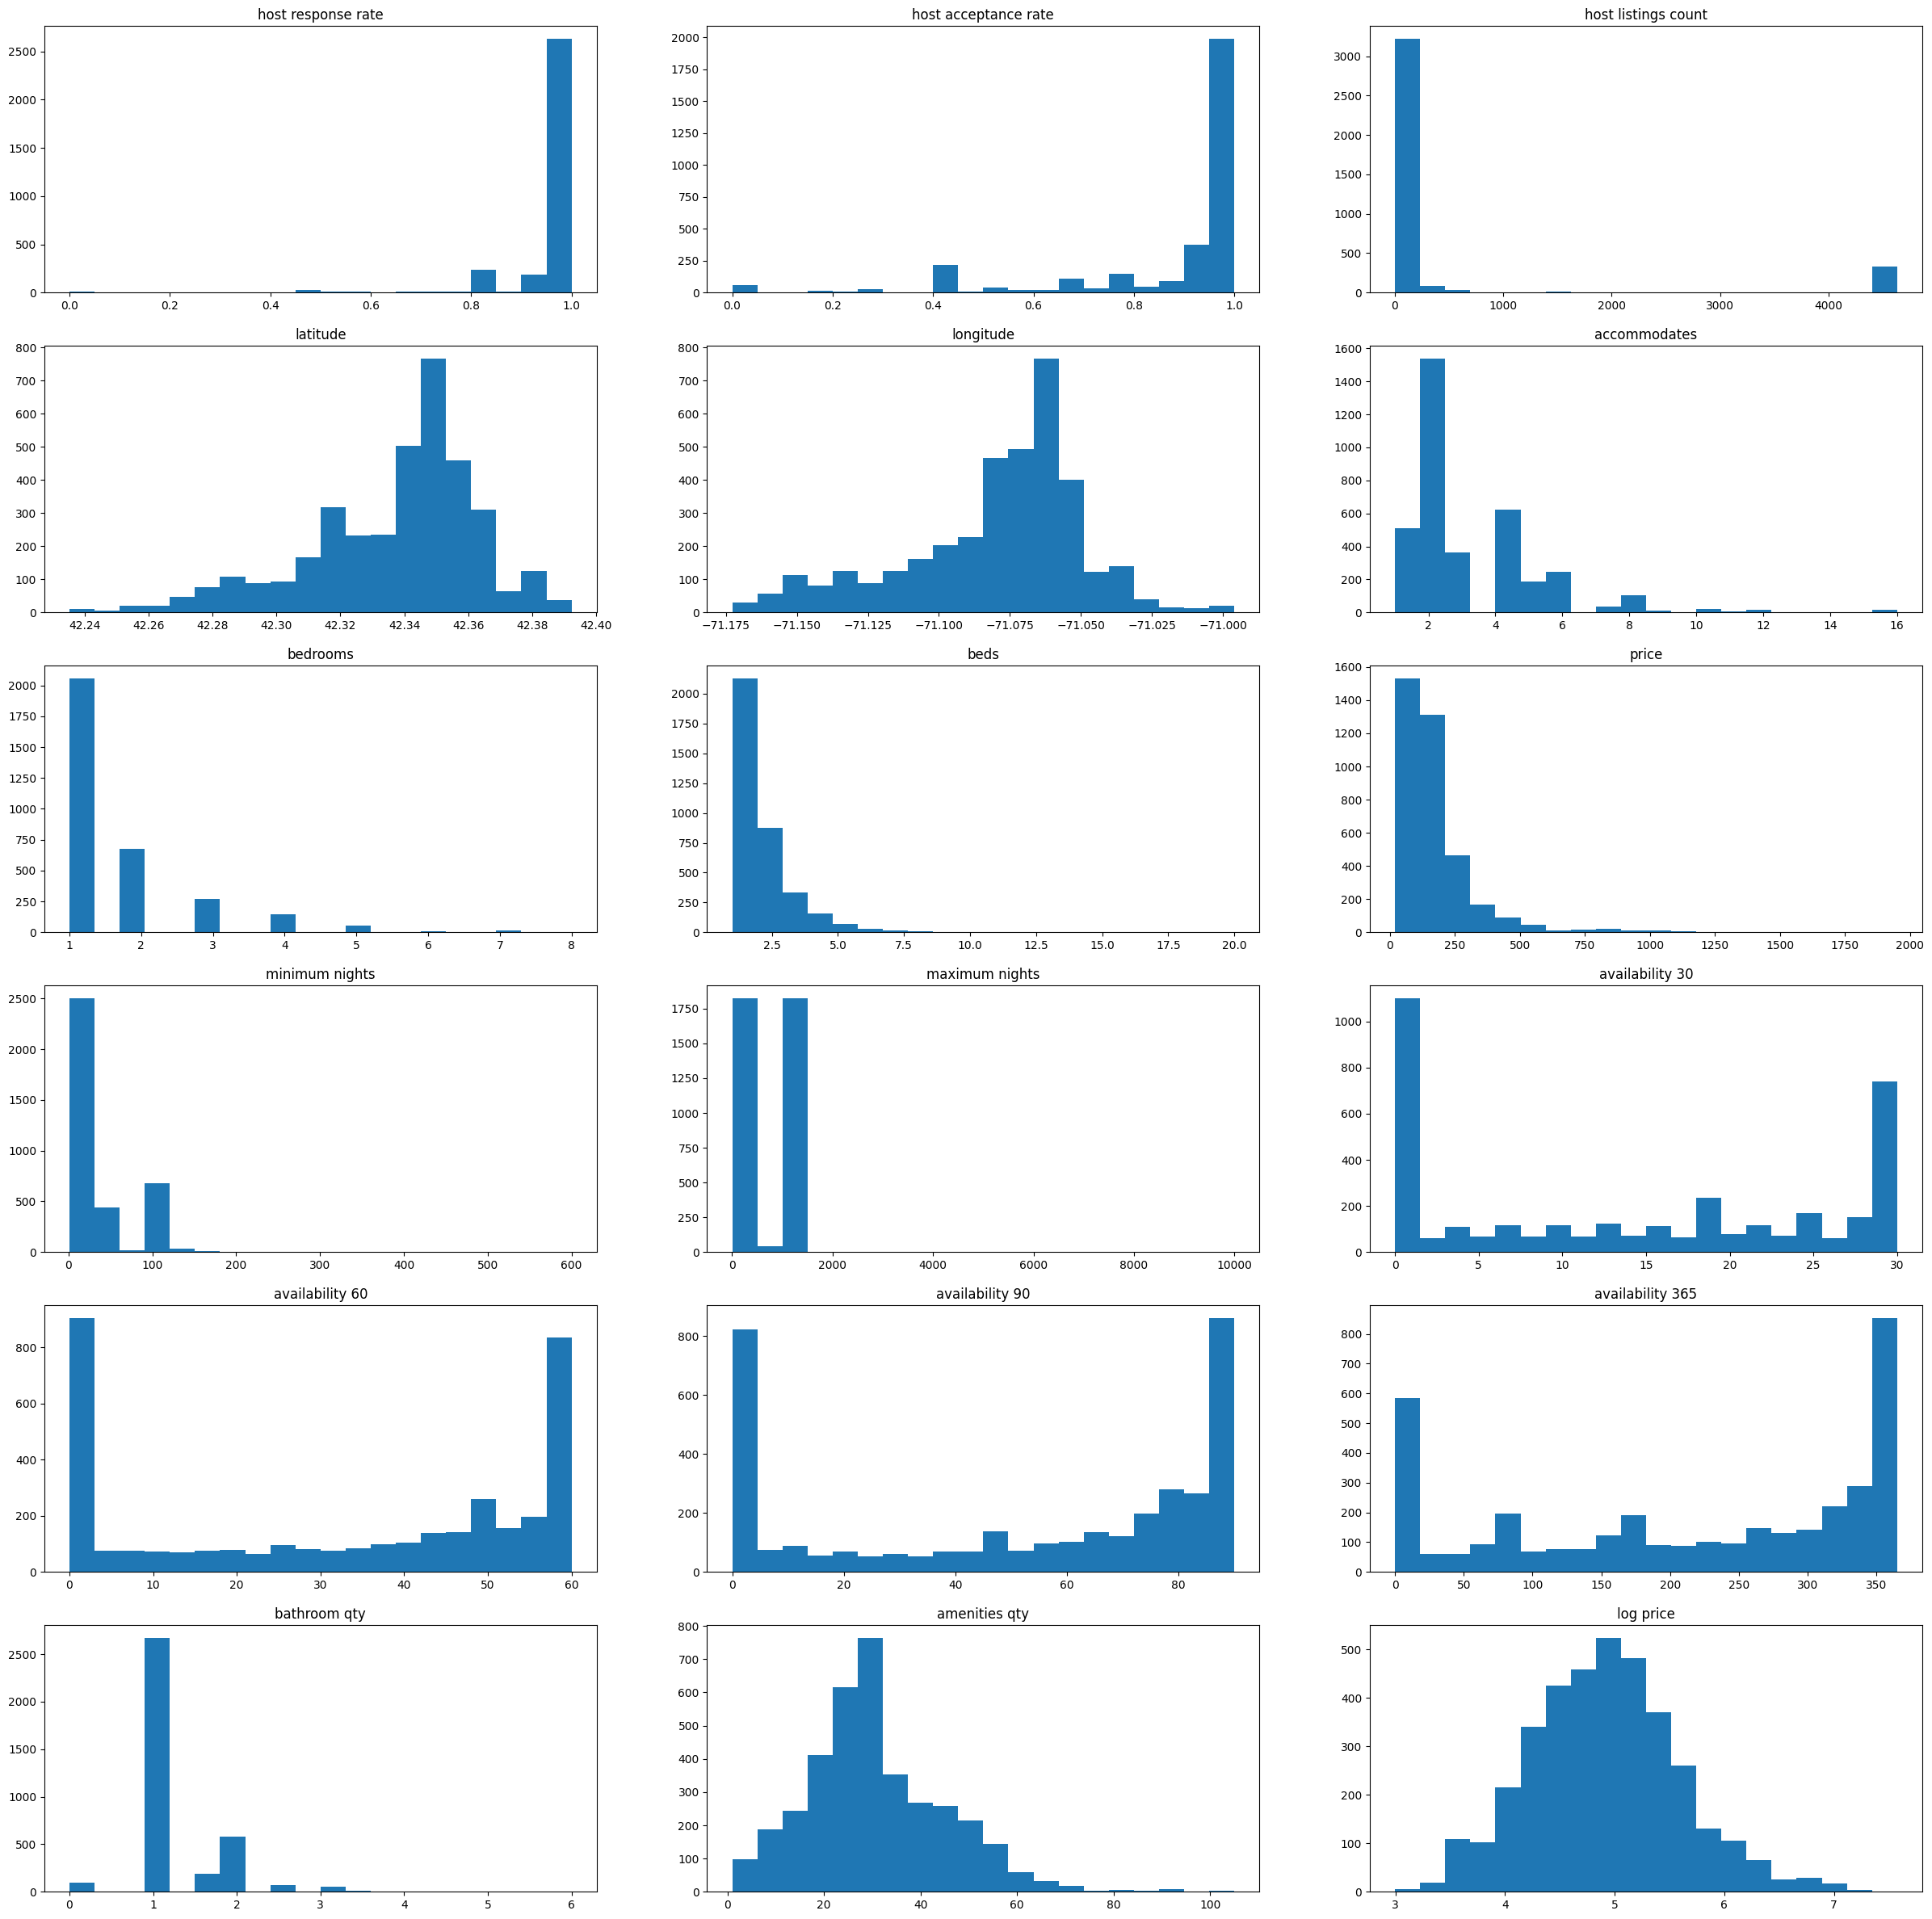

In [16]:
# Create a 6 by 3 grid of histograms for each numerical feature
fig, ax = plt.subplots(6, 3, figsize=(30, 30))

for col in attribs_numeric:
    i = attribs_numeric.index(col)
    r, c = i // 3, i % 3

    ax[r, c].hist(listings_df[col], bins=20)
    ax[r, c].set_title(col.replace('_', ' '))

#### Categorical Column Cout Plots

The code below creates a 6 by 3 grid of countplots for each categorical feature in the `listings_df` data frame. It iterates through each column in the `attribs_categorical` list, sets the row and column location of the plot, and creates a countplot using `sns.countplot()`. The title of each plot is set to the column name with underscores replaced by spaces, and the x and y labels are removed. If the column is either 'neighbourhood_group' or 'property_type', the X axis tick labels are modified to only display the first two characters for easier readability. It is evident that the majority of listings possess all the selected amenities, the host response time is generally under an hour, and Dorchester is the neighborhood with the highest number of listings.

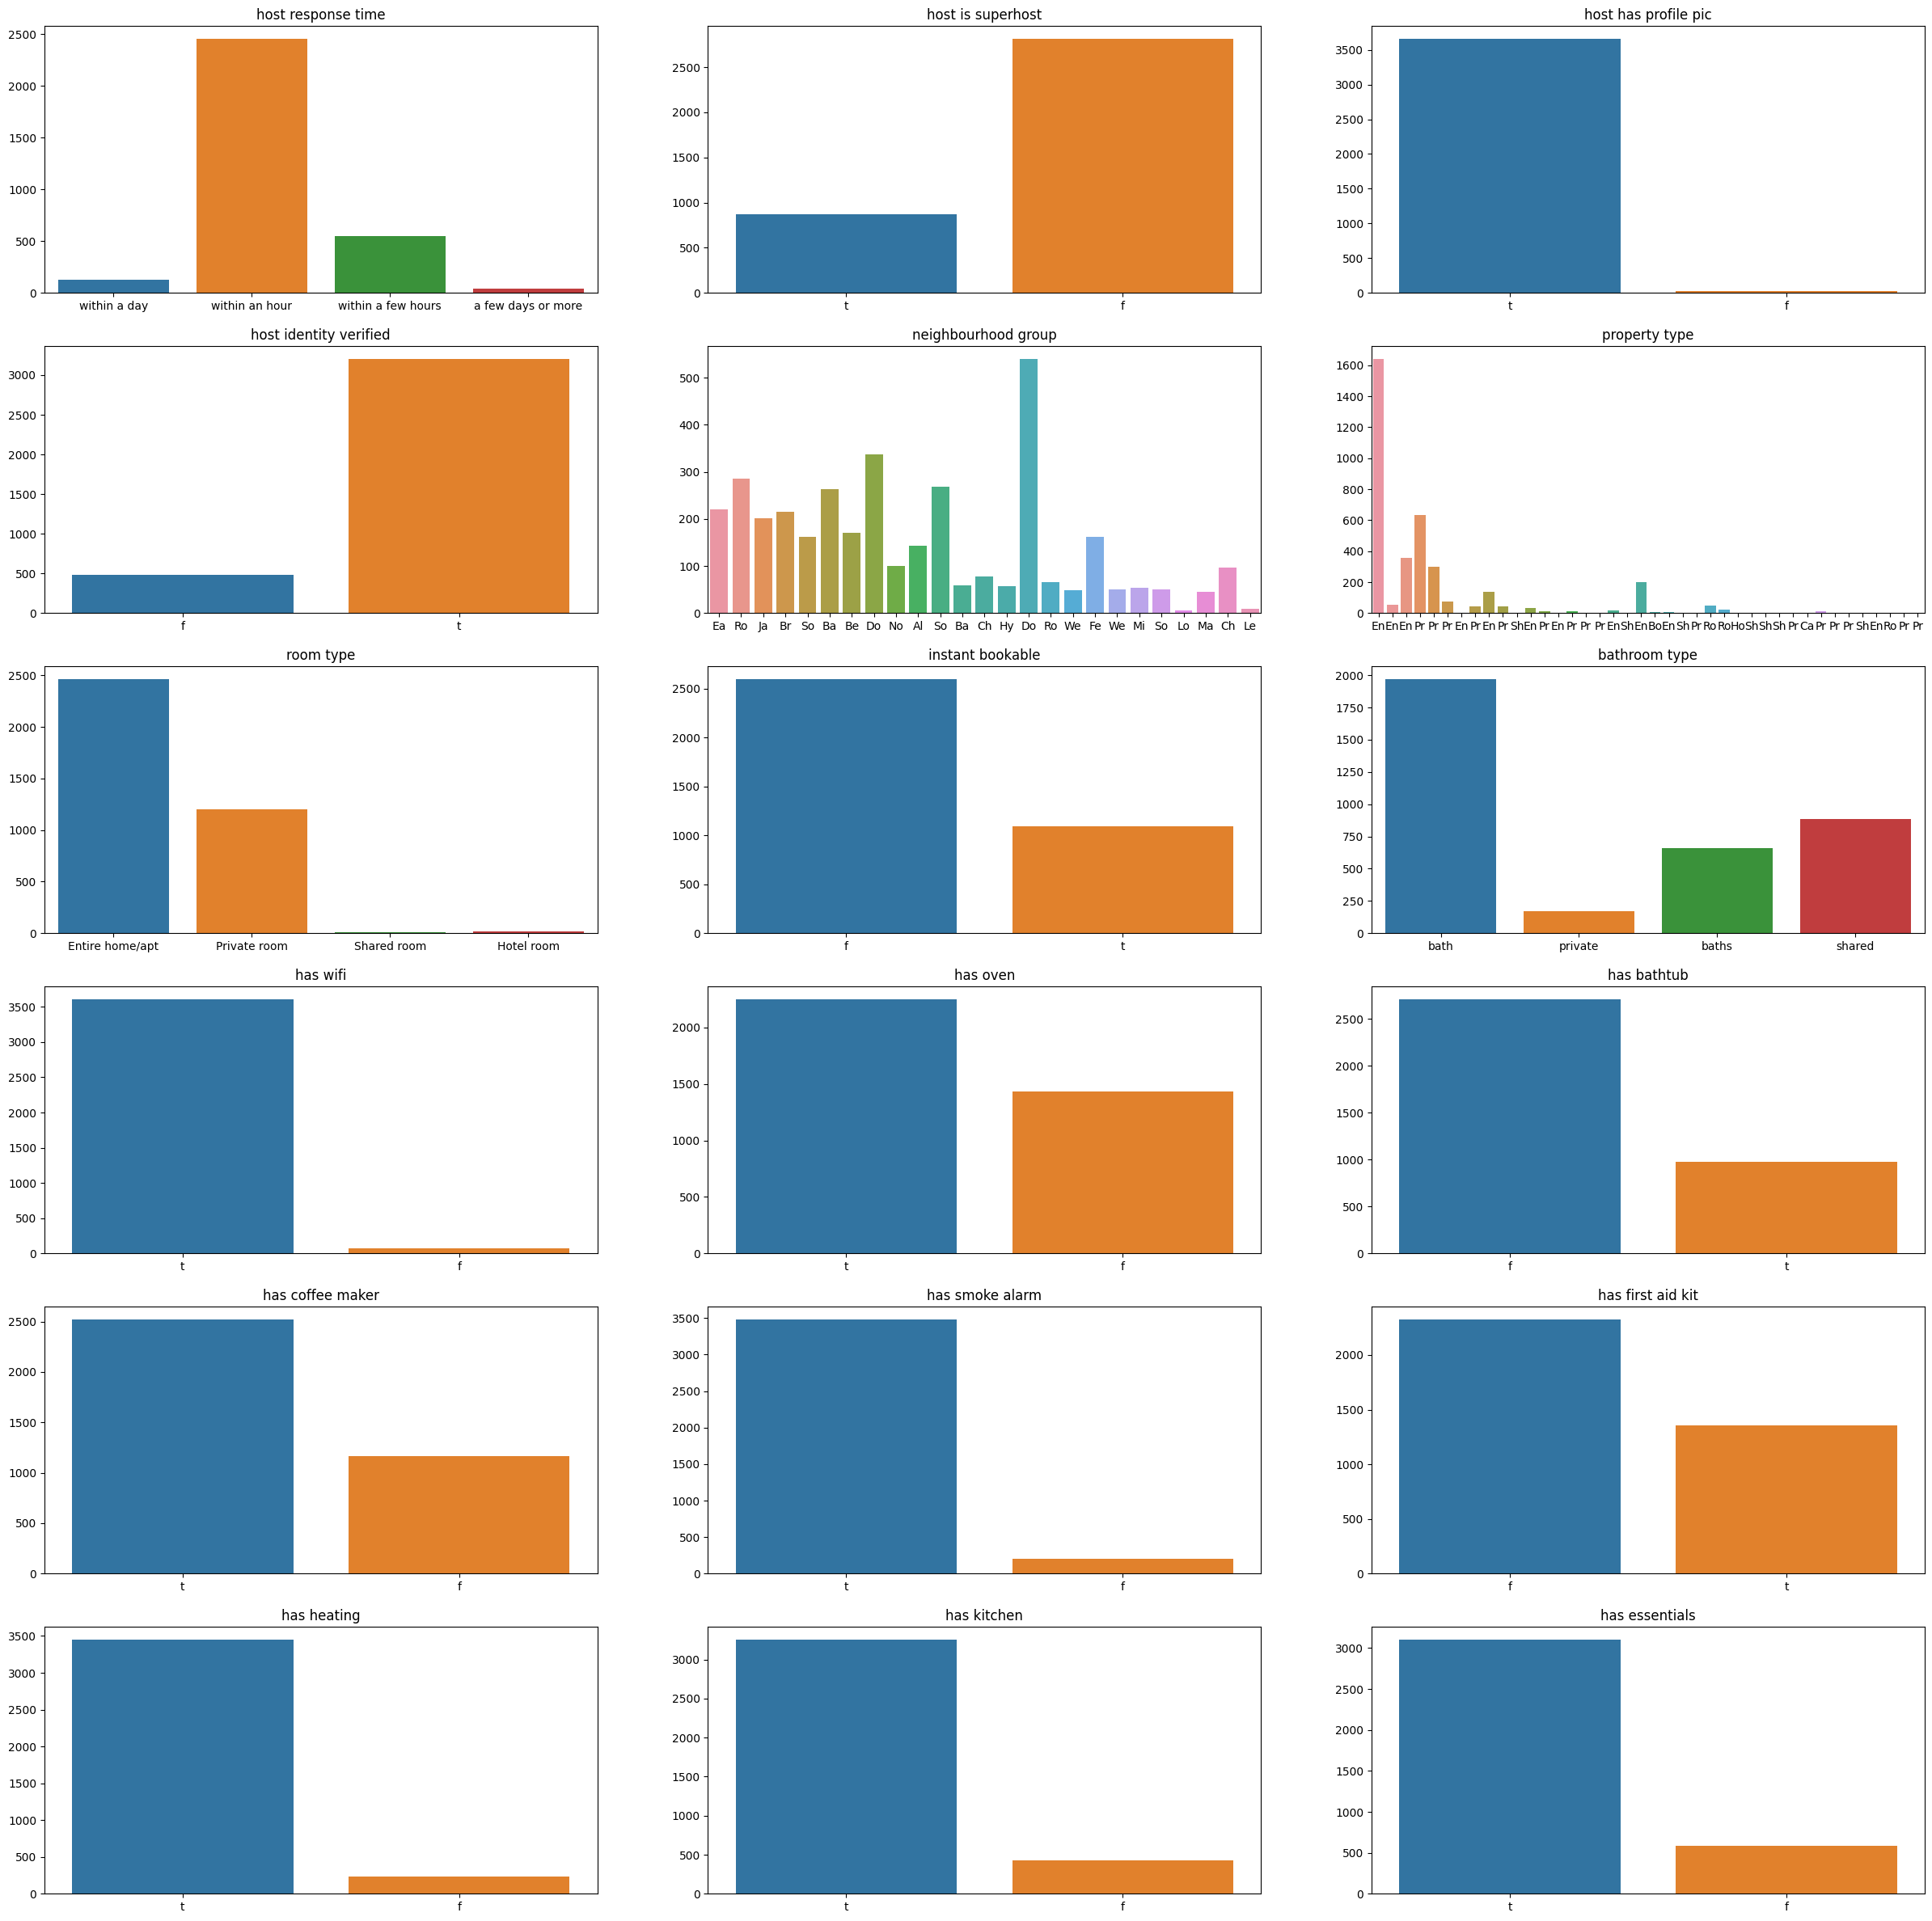

In [17]:
# Create a 6 by 3 grid of countplots for each categorical feature
fig, ax = plt.subplots(6, 3, figsize=(30, 30))

for col in attribs_categorical:
    i = attribs_categorical.index(col)
    r, c = i // 3, i % 3

    sns.countplot(data=listings_df, x=col, ax=ax[r, c])
    ax[r, c].set_title(col.replace('_', ' '))
    ax[r, c].set_xlabel('')
    ax[r, c].set_ylabel('')

    # Make X axis tick labels easier to see
    if col == 'neighbourhood_group' or col == 'property_type':
        xticklabels = ax[r, c].get_xticklabels()
        xticklabels_new = [xticklabel.get_text()[:2] for xticklabel in xticklabels]
        ax[r, c].set_xticklabels(xticklabels_new)

#### Numerical Column Scatter Plots

The code below creates a 6 by 3 grid of scatter plots where each scatter plot compares a numeric attribute against the price attribute. It loops through each numeric attribute in `attribs_numeric`, removes any NaN values from the attribute and 'price' columns, and creates a scatter plot with a red line of best fit. The resulting plot shows the relationship between each numeric attribute and the price of the listing. It can be inferred that the attributes of the number of people accommodated, the number of bedrooms, the number of beds, and the number of bathrooms exhibit a strong linear relationship with the price attribute.

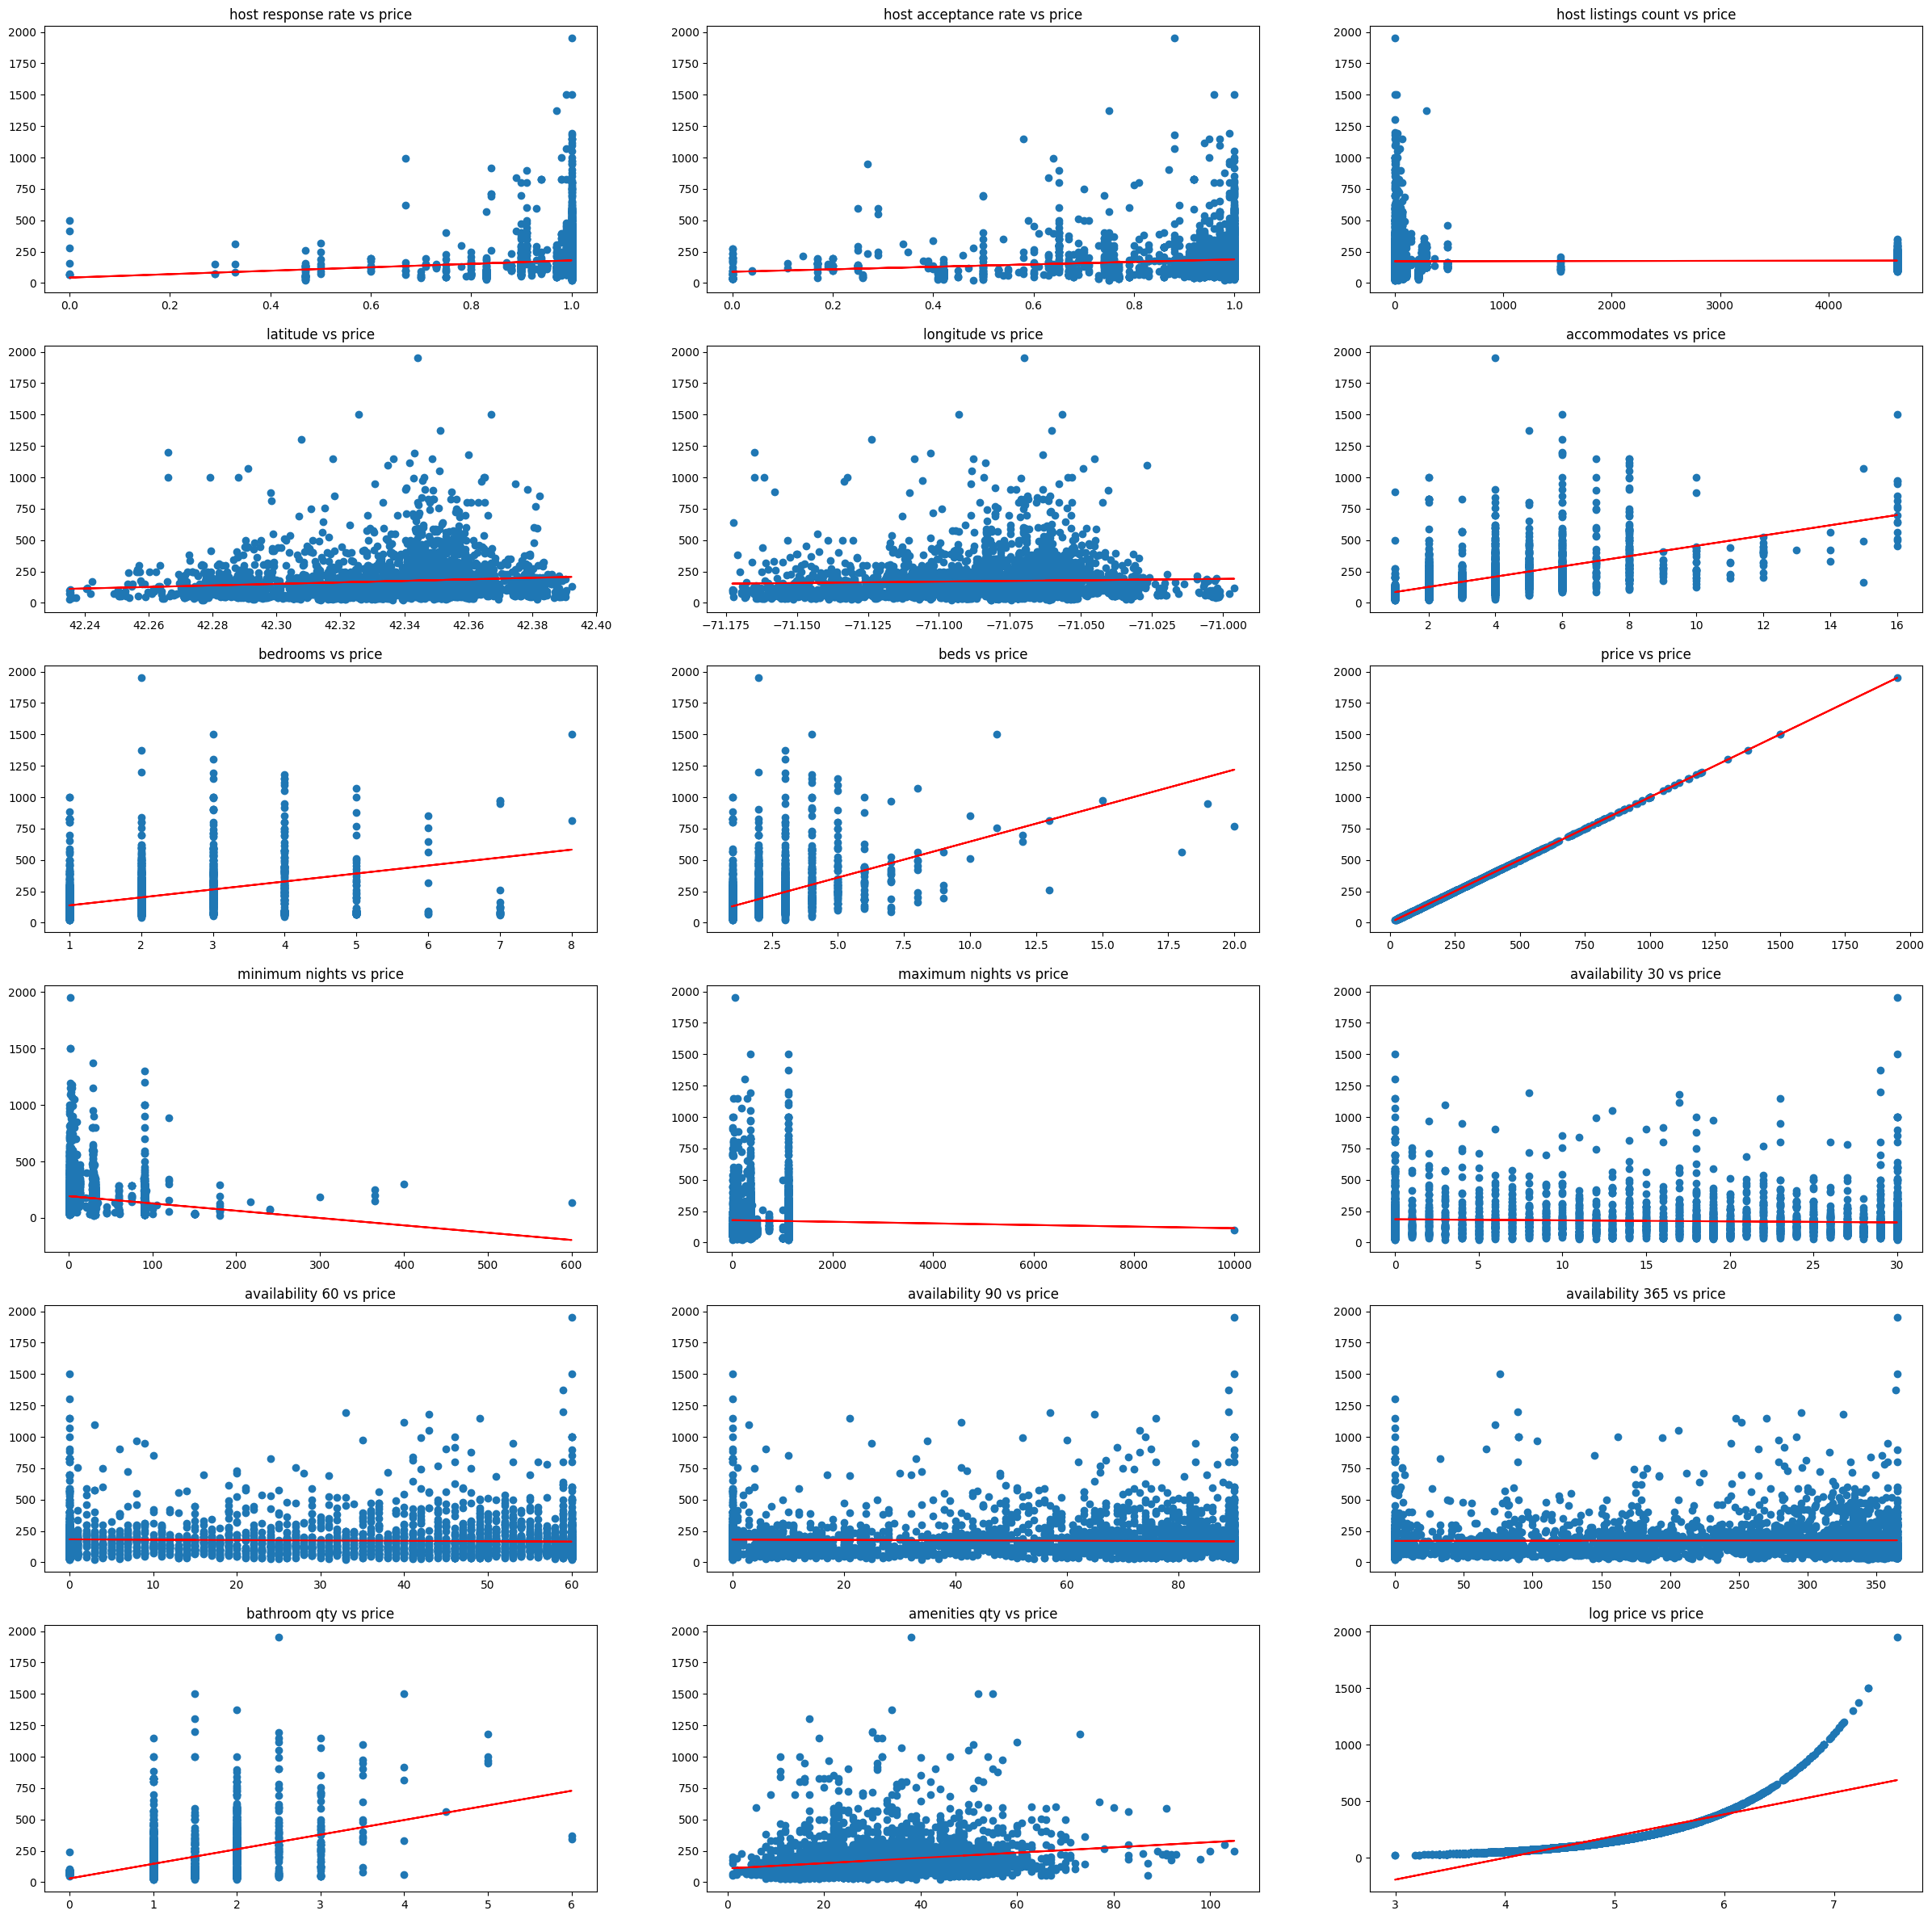

In [18]:
# Create a 6 by 3 grid of scatter plots, where each scatter plot compares a numeric attribute against the price attribute
fig, ax = plt.subplots(6, 3, figsize=(30, 30))

for col in attribs_numeric:
    x = listings_df[col]
    y = listings_df['price']
    x_no_nan = x[~np.isnan(x)]
    y_no_nan = y[~np.isnan(x)]
    i = attribs_numeric.index(col)
    r, c = i // 3, i % 3

    ax[r, c].scatter(x, y)
    ax[r, c].set_title(col.replace('_', ' ')+' vs price')
    m, b = np.polyfit(x_no_nan, y_no_nan, 1)
    ax[r, c].plot(x_no_nan, m*x_no_nan + b, color='red')

#### Residuals

The code below calculates the residual sum of squares (RSS) for each numeric attribute, excluding 'price' and 'log_price', when used as a predictor of the 'price' attribute. The residual sum of squares is a measure of the amount of variance in the data that is not explained by the regression model. The result shows a dictionary of residual sum of squares values for each numeric attribute. The lower the value of RSS, the better the numeric attribute is at predicting the price. The attribute 'accommodates' has the lowest RSS value of 55629344.4159, indicating that it has the strongest linear relationship with the 'price' attribute. The attributes 'longitude', 'maximum_nights', and availability columns have the highest RSS values, indicating that they have the weakest linear relationship with the 'price' attribute.

In [19]:
# Calculate the residual sum of squares for each numeric attribute (excluding price and log_price) when used as a predictor of the price attribute
residuals = {}
attribs_numeric_no_price = [col for col in attribs_numeric if col not in ['price', 'log_price']]

# Iterate through each column in attribs_numeric_no_price, set up the x and y variables to be used in linear regression, and calculate the residual sum of squares for the linear regression model
for col in attribs_numeric_no_price:
    x = listings_df[col]
    y = listings_df['price']
    x_no_nan = x[~np.isnan(x)]
    y_no_nan = y[~np.isnan(x)]

    m, b = np.polyfit(x_no_nan, y_no_nan, 1)
    predicted = m * x + b
    residual = np.sum((predicted - y)**2)
    residuals[col] = residual

print("Residuals:", residuals)

Residuals: {'host_response_rate': 69908910.77355127, 'host_acceptance_rate': 70148080.48310989, 'host_listings_count': 83935360.78918304, 'latitude': 82958377.83597712, 'longitude': 83770480.80756693, 'accommodates': 55629344.41594513, 'bedrooms': 66752504.688857056, 'beds': 61269014.018697605, 'minimum_nights': 81552941.5866094, 'maximum_nights': 83909086.11157332, 'availability_30': 83600556.28015716, 'availability_60': 83758450.35766038, 'availability_90': 83829477.67293034, 'availability_365': 83928864.79249772, 'bathroom_qty': 68314096.52157888, 'amenities_qty': 80614466.85388349}


In [20]:
# Sorts the residuals dictionary in ascending order based on the residual sum of squares, then selects the top 5 features with the lowest residual sum of squares (i.e., the features that are best predictors of the price attribute)
sorted_residuals = sorted(residuals.items(), key=lambda x: x[1])
top5 = sorted_residuals[:5]
print("Top 5 numeric features in predicting price (Residual):")
for feat, res in top5:
    print(feat, ":", res)

Top 5 numeric features in predicting price (Residual):
accommodates : 55629344.41594513
beds : 61269014.018697605
bedrooms : 66752504.688857056
bathroom_qty : 68314096.52157888
host_response_rate : 69908910.77355127


#### RMS Residuals

The code below calculates the root mean square (RMS) residuals for each numeric feature by dividing the residual sum of squares by the number of data points, then taking the square root. The RMS residual is a measure of how well a linear regression model fits the data. It represents the average amount of error between the predicted values and the actual values, and is a commonly used metric for evaluating the accuracy of regression models. Looking at the results, it is clear that the 'accommodates' feature has the lowest RMS residual of 122.82, followed by 'beds' and 'bedrooms', which have RMS residuals of 128.89 and 134.54, respectively. This indicates that these three features are the best predictors of price among the numeric features in the dataset. Other features with relatively low RMS residuals include 'bathroom_qty' with 136.10 and 'amenities_qty' with 147.85. On the other hand, some features such as 'host_response_rate', 'host_acceptance_rate', and 'host_listings_count' have relatively high RMS residuals above 137, which indicates that they are not good predictors of the price attribute.

In [21]:
# Calculate the root mean square (RMS) residuals for each numeric feature by dividing the residual sum of squares by the number of data points, then taking the square root
rms_residuals = {}

for col, resid in residuals.items():
    rms_residuals[col] = np.sqrt(resid / len(listings_df))

print("RMS Residuals:", rms_residuals)

RMS Residuals: {'host_response_rate': 137.67998550738716, 'host_acceptance_rate': 137.91529718722362, 'host_listings_count': 150.86101473585566, 'latitude': 149.9804559176315, 'longitude': 150.71276858237803, 'accommodates': 122.81644286384929, 'bedrooms': 134.53594287951336, 'beds': 128.89171119774147, 'minimum_nights': 148.70458491769799, 'maximum_nights': 150.8374005240326, 'availability_30': 150.55983406422928, 'availability_60': 150.70194610949036, 'availability_90': 150.7658303284015, 'availability_365': 150.8551768410501, 'bathroom_qty': 136.10049611890494, 'amenities_qty': 147.8464962625992}


In [22]:
# Sort the rms_residuals dictionary by the values (RMS residual values) in ascending order, then selects the top 5 features with the lowest RMS residual values
sorted_rms_residuals = sorted(rms_residuals.items(), key=lambda x: x[1])
top5 = sorted_rms_residuals[:5]
print("Top 5 numeric features in predicting price (RMS Residual):")
for feat, res in top5:
    print(feat, ":", res)

Top 5 numeric features in predicting price (RMS Residual):
accommodates : 122.81644286384929
beds : 128.89171119774147
bedrooms : 134.53594287951336
bathroom_qty : 136.10049611890494
host_response_rate : 137.67998550738716


#### P-Values

The code below performs linear regression for each numeric feature with the target variable price and calculates the p-value for each regression. The p-value represents the probability of obtaining a result equal to or more extreme than what was actually observed if the null hypothesis is true. The result shows the p-value for each numeric feature. Features with a p-value less than 0.05 are statistically significant, indicating a strong linear relationship between the feature and the target variable. Notable results include 'host_acceptance_rate', 'latitude', 'bedrooms', 'beds', 'bathroom_qty', and 'amenities_qty', which have extremely low p-values, indicating a strong linear relationship. On the other hand, 'host_response_rate', 'maximum_nights', and 'availability_365' have p-values greater than 0.05, suggesting insufficient evidence to reject the null hypothesis.

In [23]:
# Calculates the p-value for each numeric feature using a linear regression model
pvalues = {}

for col in attribs_numeric_no_price:
    x = listings_df[col]
    y = listings_df['price']
    x_no_nan = x[~np.isnan(x)]
    y_no_nan = y[~np.isnan(x)]
    slope, intercept, r_value, p_value, std_err = linregress(x_no_nan, y_no_nan)
    pvalues[col] = p_value

print("P-values:", pvalues)

P-values: {'host_response_rate': 4.4238078359869766e-07, 'host_acceptance_rate': 6.280870524105595e-17, 'host_listings_count': 0.5275810861525074, 'latitude': 4.135160560566228e-11, 'longitude': 0.00569031100941507, 'accommodates': 0.0, 'bedrooms': 4.323639314848149e-140, 'beds': 2.2199701346421465e-244, 'minimum_nights': 5.667310467652823e-25, 'maximum_nights': 0.21270513165035929, 'availability_30': 0.00010039260370113585, 'availability_60': 0.004246770819425997, 'availability_90': 0.0246091332086971, 'availability_365': 0.4081130943032719, 'bathroom_qty': 3.702027027265584e-167, 'amenities_qty': 2.6212456375212114e-34}


In [24]:
# Identify which numeric features are significantly correlated with the 'price' target variable
significant_features = [col for col in pvalues if pvalues[col] < 0.01]
insignificant_features = [col for col in pvalues if pvalues[col] >= 0.01]

print("Significant Features:", significant_features)
print("Insignificant Features:", insignificant_features)

Significant Features: ['host_response_rate', 'host_acceptance_rate', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'minimum_nights', 'availability_30', 'availability_60', 'bathroom_qty', 'amenities_qty']
Insignificant Features: ['host_listings_count', 'maximum_nights', 'availability_90', 'availability_365']


#### Principal Component Analysis

The code below performs Principal Component Analysis (PCA) on a dataset containing numerical features. PCA is a dimensionality reduction technique that transforms a set of correlated variables into a smaller set of uncorrelated variables called principal components. The result shows the ratio of variance explained by each principal component, which indicates the amount of information each component contributes to the overall dataset. The higher the variance ratio, the more important the component is in explaining the variance in the data. The output indicates that the feature 'host_response_rate' explains the majority of the variance in the dataset (87.14%), followed by 'host_acceptance_rate' (10.67%), 'host_listings_count' (1.14%), and 'latitude' (0.92%). The remaining features have a relatively small contribution to the overall variance in the data. The least significant features in the dataset are 'amenities_qty', 'bathroom_qty', and 'availability_365', as they have the smallest variance ratios.

In [25]:
# Performs Principal Component Analysis (PCA) on a dataset containing numerical features
imputer = SimpleImputer()
imputed_data = imputer.fit_transform(listings_df[attribs_numeric])

pca = PCA()
pca.fit(imputed_data)

# Calculates the ratio of variance explained by each principal component, and stores it in a dictionary where the keys are the feature names
variance_ratios = {attribs_numeric[i]: ratio for i, ratio in enumerate(pca.explained_variance_ratio_)}
sorted_variances = sorted(variance_ratios.items(), key=lambda x: x[1], reverse=True)

for var, ratio in sorted_variances:
    print(f"{var}: {ratio}")

host_response_rate: 0.8714101569120697
host_acceptance_rate: 0.10666252081658724
host_listings_count: 0.011437098688895118
latitude: 0.009152839758590431
longitude: 0.000761467889435372
accommodates: 0.0004705234417652089
bedrooms: 8.095258188603552e-05
beds: 1.921013242337195e-05
price: 2.6632045908368394e-06
minimum_nights: 1.9689665822123747e-06
maximum_nights: 2.441659969021022e-07
availability_30: 1.8409087054084558e-07
availability_60: 1.0788325474135214e-07
availability_90: 4.3111910686839886e-08
availability_365: 1.4166405534629615e-08
bathroom_qty: 3.3871719772608883e-09
amenities_qty: 5.553894566874555e-10
log_price: 2.4617461369264685e-10


#### Categorical Column Box Plots

The code below creates a grid of boxplots for each categorical attribute in the list `attribs_categorical`. The boxplot shows the distribution of prices for each category of the categorical attribute. The `Seaborn` library is used to create each boxplot. The for loop iterates through each categorical attribute, sets the corresponding boxplot in the grid, and adds labels to the plot. For 'neighbourhood_group' and 'property_type' attributes, the tick labels on the x-axis are modified to show only the first two characters of each label. The resulting grid of boxplots provides insights into the relationships between categorical attributes and the target variable price. It is clear that Chinatown is the neighborhood with the highest average listing price among all the neighborhoods in the dataset. Additionally, the plot indicates that hotel rooms are the most expensive room type based on the average price of the listings.

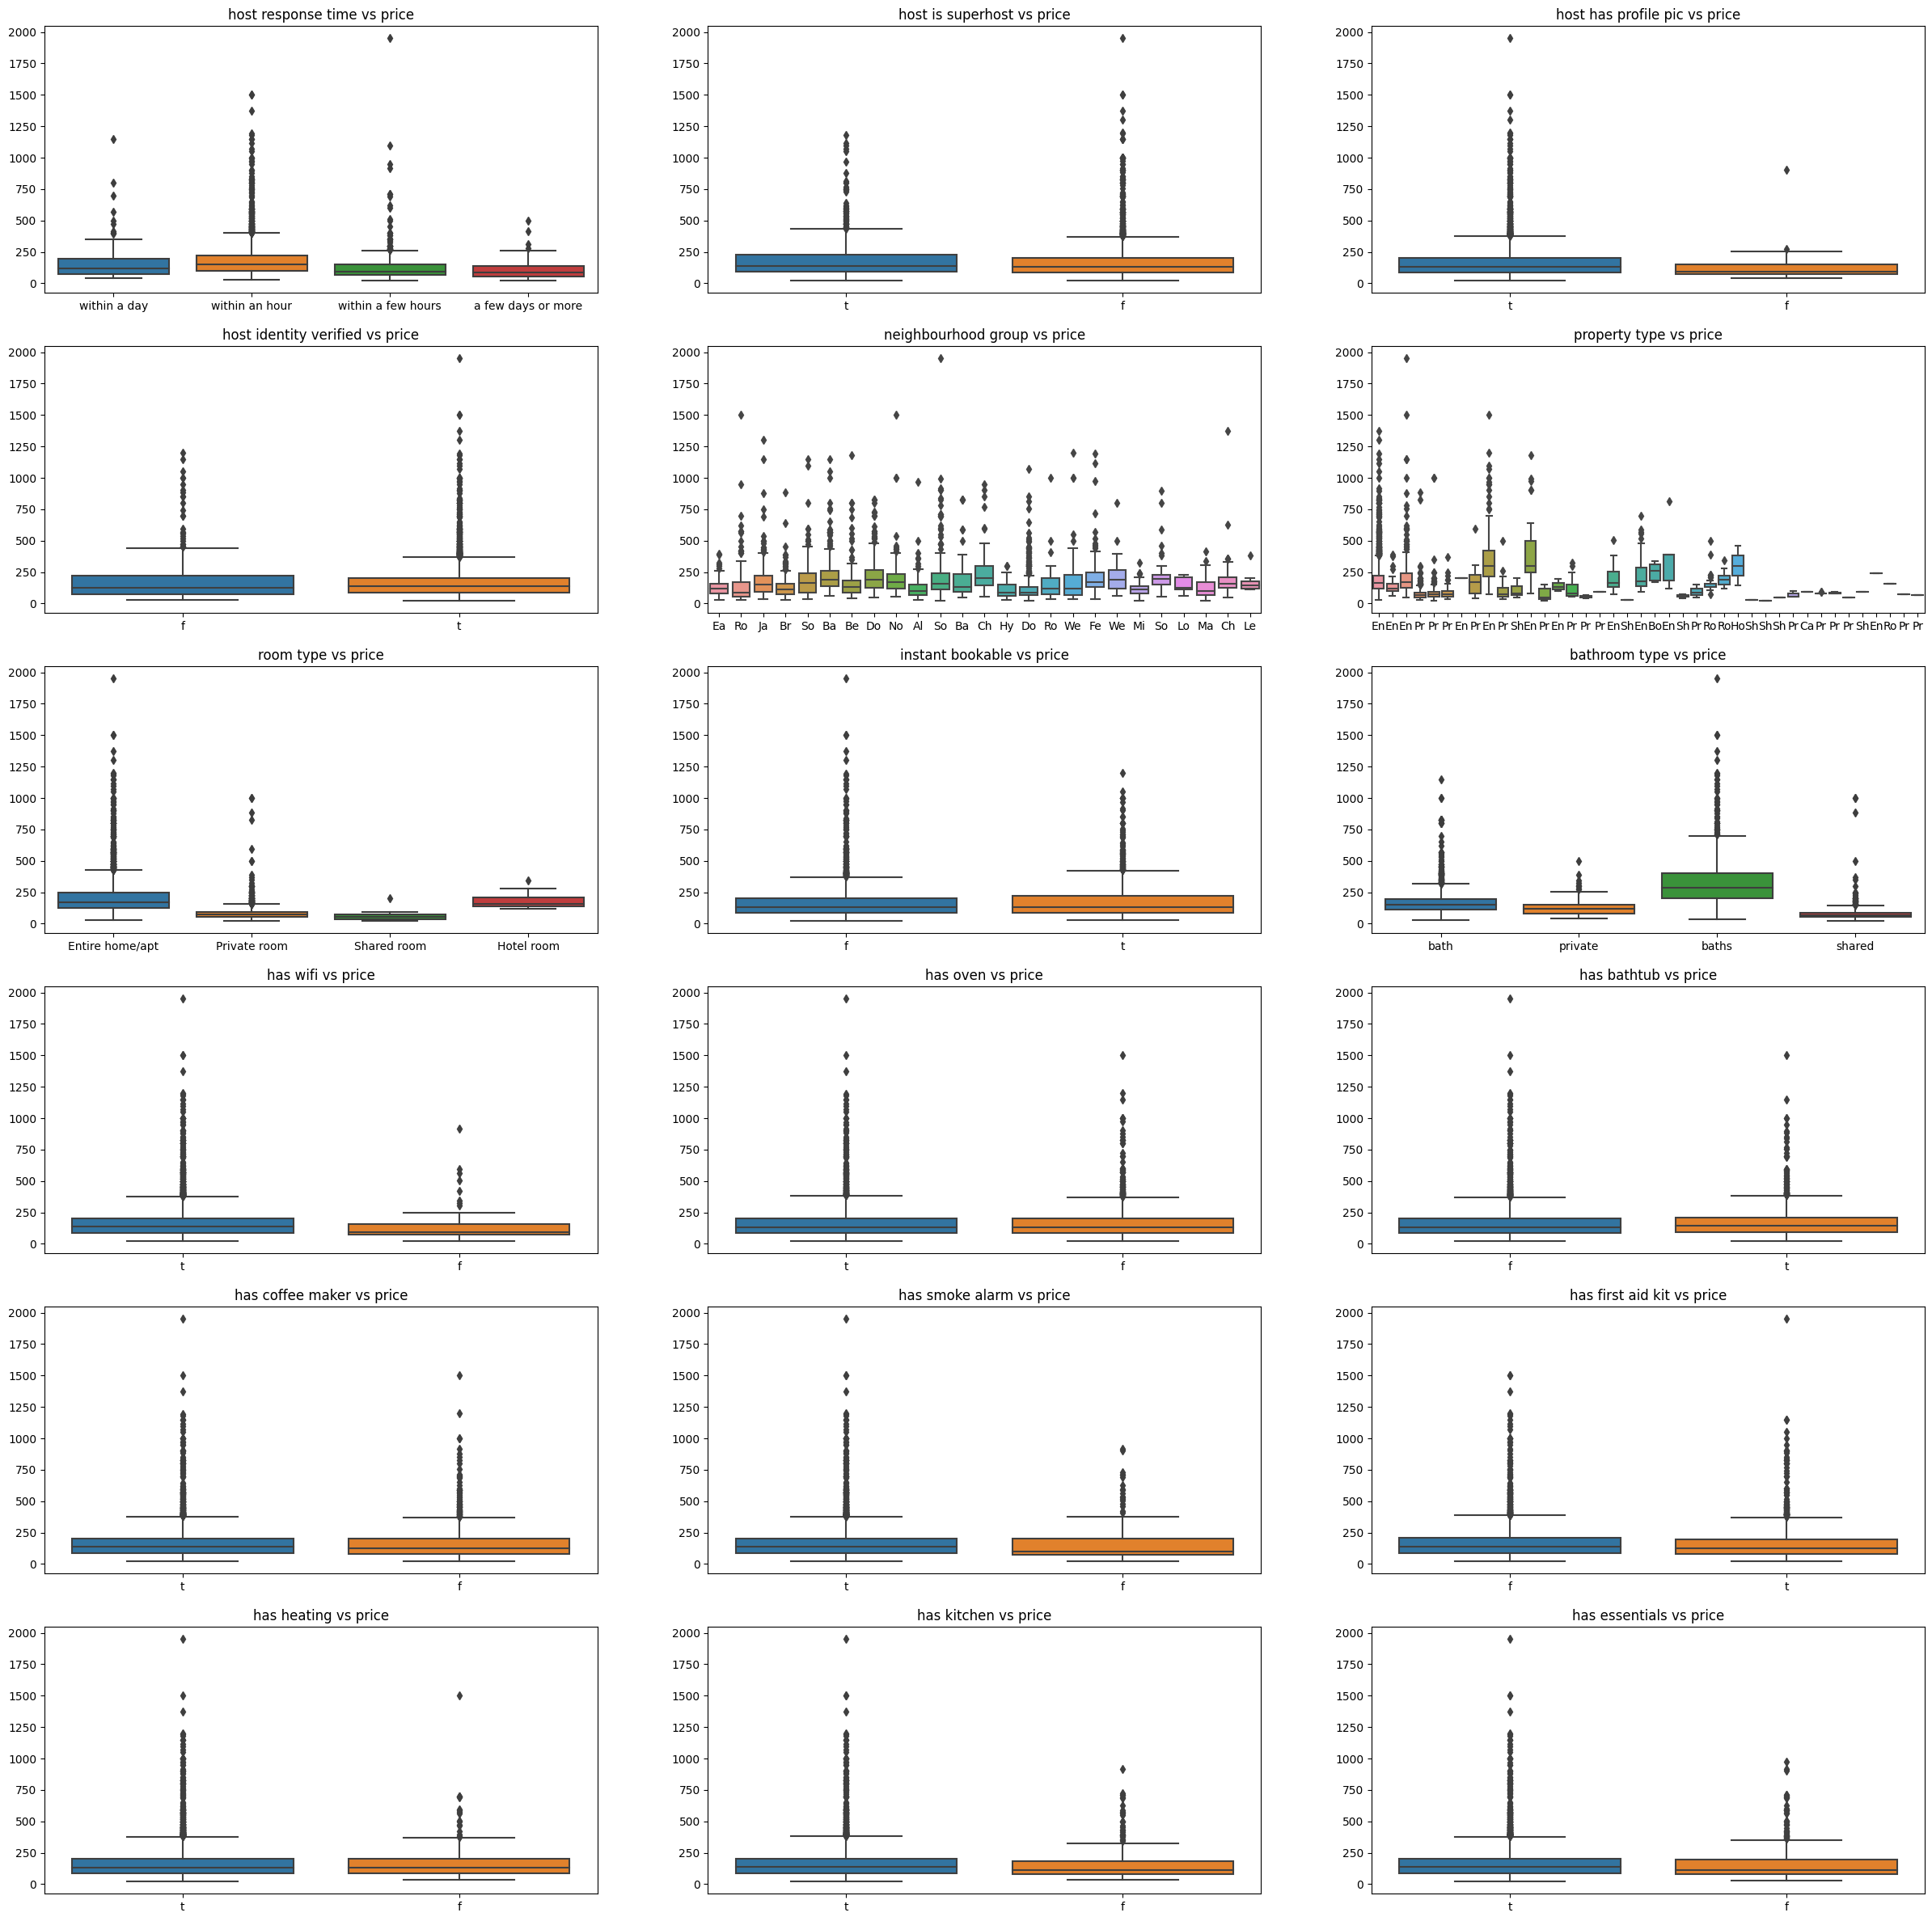

In [26]:
# Create a 6x3 grid of boxplots for each categorical attribute
fig, ax = plt.subplots(6, 3, figsize=(30, 30))

for col in attribs_categorical:
    i = attribs_categorical.index(col)
    r, c = i // 3, i % 3
    sns.boxplot(data=listings_df, x=col, y='price', ax=ax[r, c])
    ax[r, c].set_title(col.replace('_', ' ')+' vs price')
    ax[r, c].set_xlabel('')
    ax[r, c].set_ylabel('')

    # Make X axis tick labels easier to see
    if col == 'neighbourhood_group' or col == 'property_type':
        xticklabels = ax[r, c].get_xticklabels()
        xticklabels_new = [xticklabel.get_text()[:2] for xticklabel in xticklabels]
        ax[r, c].set_xticklabels(xticklabels_new)

### Visualizations

#### Visualization 1

This code creates a pie chart to display the distribution of Airbnb listings across different price categories and neighborhoods in a given city. The outer pie chart shows the distribution of listings across different neighborhoods, and the inner pie chart shows the distribution of listings within each neighborhood, broken down by price categories. The `combined_ser` variable is a pandas Series object containing the count of listings for each combination of neighborhood and price category. To create the inner pie chart, the `unstack` method is used to pivot the Series into a data frame with neighborhoods as rows, price categories as columns, and counts as values. The `ravel` method is then used to flatten the data frame into a one-dimensional array of counts. The `colors` argument of the `pie` function is set to a colormap generated from the `Blues` colormap using the `np.linspace` function to divide the colormap into a number of equal parts equal to the number of price categories. The legend for the inner pie chart is created using the `pie_inner[0]` attribute which returns a list of the `Wedge` objects representing the pie chart wedges. The legend labels are taken from the columns of the unstacked data frame using the `columns` attribute. The `ax.set` method is used to set the aspect ratio of the pie chart to equal and to set the title of the chart.

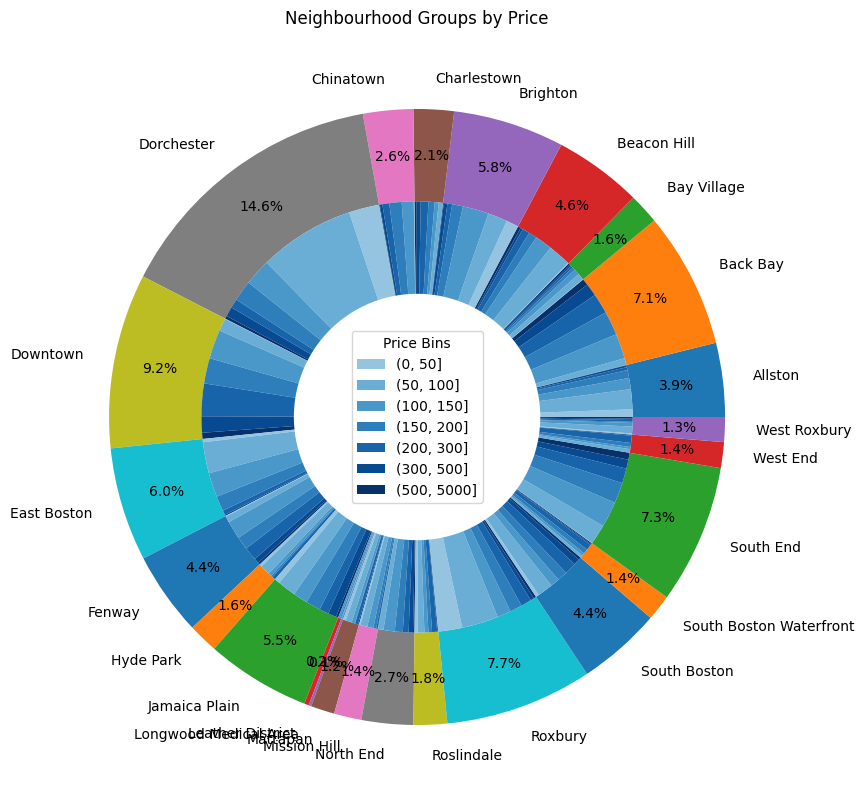

In [27]:
# Define color maps and price bins
blue, green = plt.cm.Blues, plt.cm.Greens
price_bins = [0, 50, 100, 150, 200, 300, 500, 5000]

# Create a new column with the price bins
price_ser = pd.cut(listings_df['price'], price_bins)

# Create a new DataFrame combining neighbourhood_group and price bins
neighbourhood_ser = listings_df['neighbourhood_group']
combined_df = pd.concat([neighbourhood_ser, price_ser], axis=1)

# Group the combined DataFrame by neighbourhood_group and price
combined_ser = combined_df.groupby(['neighbourhood_group', 'price']).size()

# Group the combined series by neighbourhood_group to get the total number of listings in each neighbourhood_group
combined_neighbourhood = combined_ser.groupby('neighbourhood_group').sum()

# Create a pie chart with the total number of listings in each neighbourhood_group
fig, ax = plt.subplots(figsize=(10, 10))
pie_outer = ax.pie(combined_neighbourhood.values,
                   labels=combined_neighbourhood.index,
                   radius=1,
                   autopct='%1.1f%%',
                   pctdistance=0.85,
                   wedgeprops=dict(width=0.3))

# Create a pie chart inside the first one to show the distribution of price bins for each neighbourhood_group
pie_inner = ax.pie(combined_ser.unstack().values.ravel(),
                   radius=0.7,
                   colors=plt.cm.Blues(np.linspace(0.4, 1.0, len(price_bins)-1)),
                   wedgeprops=dict(width=0.3))

# Set title, aspect ratio, and legend for the plot
ax.set(aspect="equal", title='Neighbourhood Groups by Price')
ax.legend(pie_inner[0], combined_ser.unstack().columns, loc="center", title='Price Bins')

#### Visualization 2

The code creates a scatter plot that visualizes the relationship between longitude and latitude of Airbnb listings in Boston, and their corresponding log price. The scatter plot is created with `matplotlib` library and the `scatter` method. The `c` parameter is set to the log_price column of the `listings_df`, which means that the color of each point in the plot corresponds to the logarithm of the price of the listing. The `cmap` parameter specifies the color map to use for the color-coding. In this case, the `coolwarm` color map is used. The `fig.colorbar` method is used to add a color bar to the plot, which shows the color scale for the log price values. Finally, the plot title, x-label, and y-label are set with the `ax.set_title`, `ax.set_xlabel`, and `ax.set_ylabel` methods, respectively. This plot gives a visual representation of the distribution of Airbnb listings in Boston by their geographic coordinates and their corresponding price. The plot shows that listings with higher prices tend to be located in certain areas, while lower-priced listings tend to be more scattered. Specifically, there appears to be a concentration of higher-priced listings in the central area, particularly in the Downtown and Waterfront areas.

Text(0, 0.5, 'Latitude')

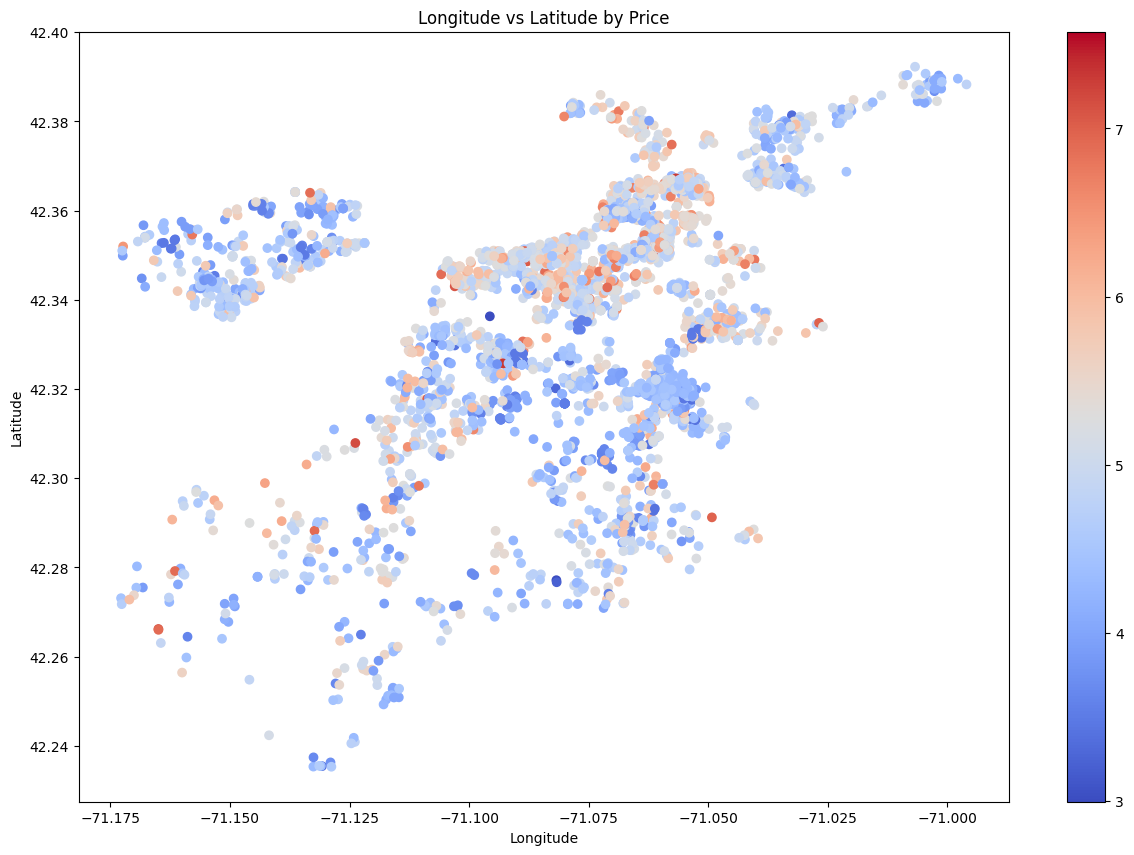

In [28]:
# Create a figure and axis with size 15x10
fig, ax = plt.subplots(figsize=(15, 10))

# Create a scatter plot of longitude vs latitude, color-coded by log price, and add a colorbar
scatter = ax.scatter(listings_df['longitude'], listings_df['latitude'], c=listings_df['log_price'], cmap='coolwarm')
fig.colorbar(scatter)

# Set the title, x-label, and y-label of the plot
ax.set_title('Longitude vs Latitude by Price')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#### Visualization 3

The code first selects only the numeric attributes from the `listings_df` data frame and creates a new data frame called `listings_df_numeric`. It then computes the correlation matrix of the numeric attributes in the `listings_df_numeric` data frame using the `corr()` method and stores it in `corr_matrix_numeric`. Finally, it creates a heatmap of the correlation matrix using the `sns.heatmap()` function from the Seaborn library. The heatmap displays the correlation coefficients between pairs of numeric attributes, with a color scale indicating the strength and direction of the correlation. A positive correlation, represented by warm colors like red and orange, indicates that when one variable increases, the other variable tends to increase as well. A negative correlation, represented by cool colors like blue and green, indicates that when one variable increases, the other variable tends to decrease. Looking at the specific correlations in the matrix, it is clear that the strongest positive correlations are between 'host_acceptance_rate' and 'host_listings_count', and between 'accommodates' and 'beds'. The strongest negative correlations are between 'minimum_nights' and 'host_acceptance_rate', and between 'minimum_nights' and 'host_response_rate'.

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Attributes')

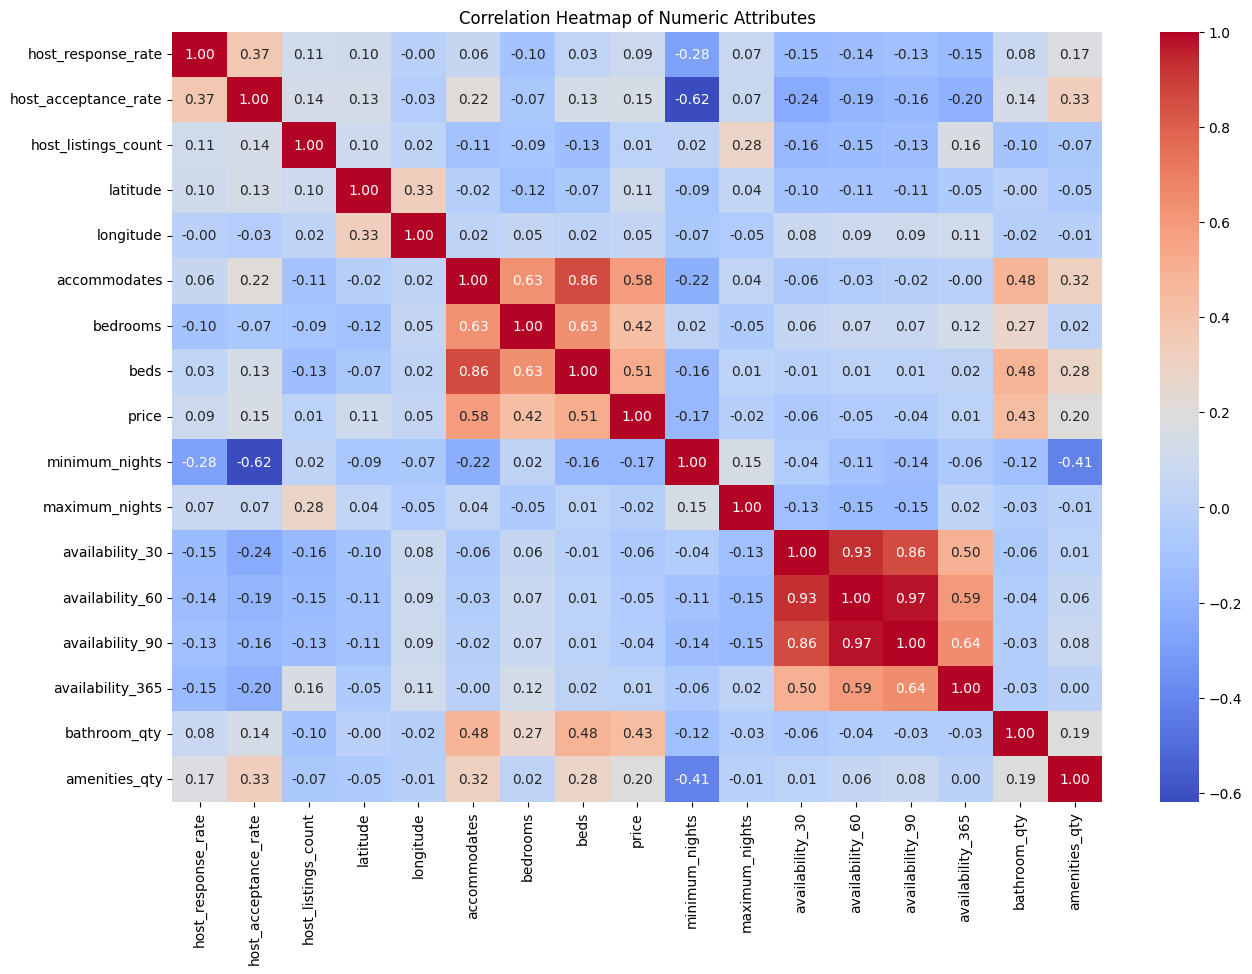

In [29]:
# Create a new DataFrame containing only the numeric attributes of the original DataFrame
listings_df_numeric = listings_df[attribs_numeric].drop(['log_price'], axis=1)

# Create a new figure and axis with the specified size
fig, ax = plt.subplots(figsize=(15, 10))

# Compute the correlation matrix of the numeric attributes and plot it as a heatmap
corr_matrix_numeric = listings_df_numeric.corr()
sns.heatmap(corr_matrix_numeric, cmap='coolwarm', ax=ax, annot=True, fmt='.2f')

# Set the title, x-label, y-label, and legend title for the plot
ax.set_title('Correlation Heatmap of Numeric Attributes')

#### Visualization 4

This code takes the `listings_df` data frame that contains data about Airbnb listings, specifically the 'availability_30' and 'log_price' columns, and creates a visualization to show the relationship between the number of available nights and the price of a listing, grouped by the number of available nights. First, the code defines the bin edges for the 'availability_30' column using a list of integers, which will be used to group the values in that column into different bins. Then, a new data frame `listings_df_vis_four` is created as a copy of `listings_df`, and a new column 'availability_30_bins' is added to it by binning the availability_30 values using the `pd.cut()` function. The resulting column contains categorical data that represents the bin in which each value falls. The code then counts the number of listings in each bin and stores the counts in a dictionary `bin_counts`, which maps each bin label to its count. The bin labels are then sorted in ascending order based on the lower bound of each bin using the `sorted()` function and a lambda function that extracts the lower bound from the label string. Next, the 'availability_30_bins' column is converted to a string type using the `apply()` function. Finally, a box plot is created using the `sns.boxplot()` function to visualize the relationship between 'log_price' and 'accommodates', grouped by 'availability_30_bins'. The resulting plot has the number of accommodates on the x-axis, the logarithm of the price on the y-axis, and a legend that shows the bins used for grouping the data. The title, x-axis label, y-axis label, and legend title are also set using the `set_title()`, `set_xlabel()`, `set_ylabel()`, and `legend()` functions, respectively. The resulting plot shows how the price of Airbnb listings varies based on the number of available days within the next 30 days, with more availability generally corresponding to lower prices. The plot also suggests that larger accommodations tend to be more expensive, as indicated by the larger box sizes in the right-hand side of the plot.

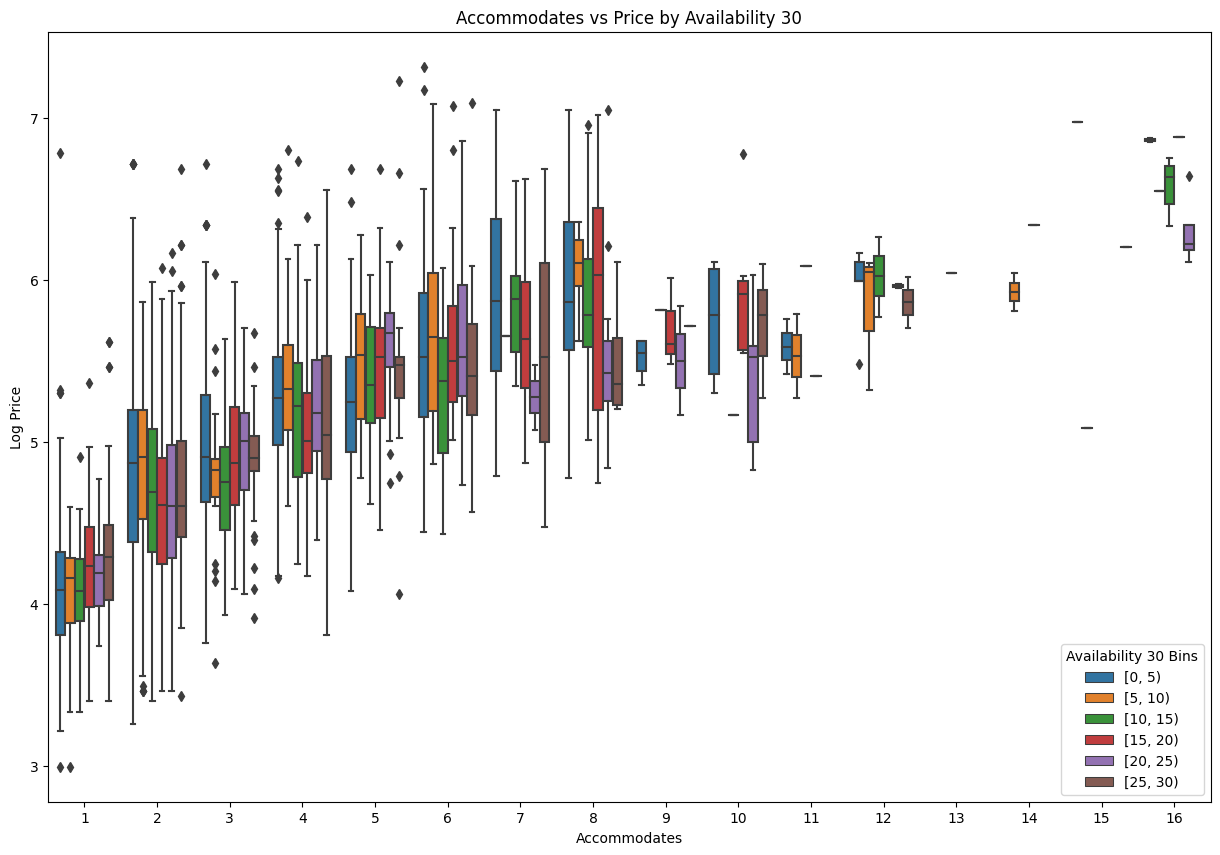

In [30]:
# Create a list of bin edges for the 'availability_30' column
bin_edges = [0, 5, 10, 15, 20, 25, 30]

# Copy the DataFrame and create a new column with binned 'availability_30' values
listings_df_vis_four = listings_df.copy()
listings_df_vis_four['availability_30_bins'] = pd.cut(listings_df_vis_four['availability_30'], bin_edges, right=False)

# Count the number of listings in each bin and store the counts in a dictionary
counts = listings_df_vis_four['availability_30_bins'].value_counts(sort=False)
bin_counts = {str(label): count for label, count in zip(counts.index, counts)}

# Sort the bin labels in ascending order based on the lower bound of each bin
bin_labels = sorted(list(bin_counts.keys()), key=lambda x: int(x.split(',')[0].strip('[')))

# Convert the 'availability_30_bins' column to string type
listings_df_vis_four['availability_30_bins'] = listings_df_vis_four['availability_30_bins'].apply(lambda x: str(x))

# Create a box plot of 'log_price' vs 'accommodates', with boxes colored by 'availability_30_bins'
fig, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data=listings_df_vis_four, x='accommodates', y='log_price', hue='availability_30_bins', ax=ax)

# Set the title, x-axis label, y-axis label, and legend title
ax.set_title('Accommodates vs Price by Availability 30')
ax.set_xlabel('Accommodates')
ax.set_ylabel('Log Price')
ax.legend(title='Availability 30 Bins')

#### Visualization 5


This code generates a visually appealing scatter plot that effectively showcases the correlation between the number of amenities and the price of a listing. The plot uses Seaborn's `scatterplot` function to create a two-dimensional representation of the data where each point represents a listing. The plot is colored based on the host response time for each listing, providing additional insights into the data. The plot's x-axis shows the quantity of amenities a listing has, while the y-axis shows the price of the listing. The plot's color coding indicates the host response time for each listing. The `data`, `x`, `y`, and `hue` arguments specify the data frame, x-axis variable, y-axis variable, and color coding variable, respectively. The plot is further enhanced by adding a title, x-axis label, y-axis label, and legend title using the `ax.set_title`, `ax.set_xlabel`, `ax.set_ylabel`, and `ax.legend` functions, respectively. The scatter plot reveals that there is a strong positive correlation between the number of amenities and the price of listings, with more expensive listings typically having more amenities. The host response time does not seem to have a significant impact on either the number of amenities or the price of listings. However, there are noticeable variations in the distribution of host response time across different regions of the scatter plot. For example, listings with higher prices and more amenities tend to have hosts who respond more quickly.

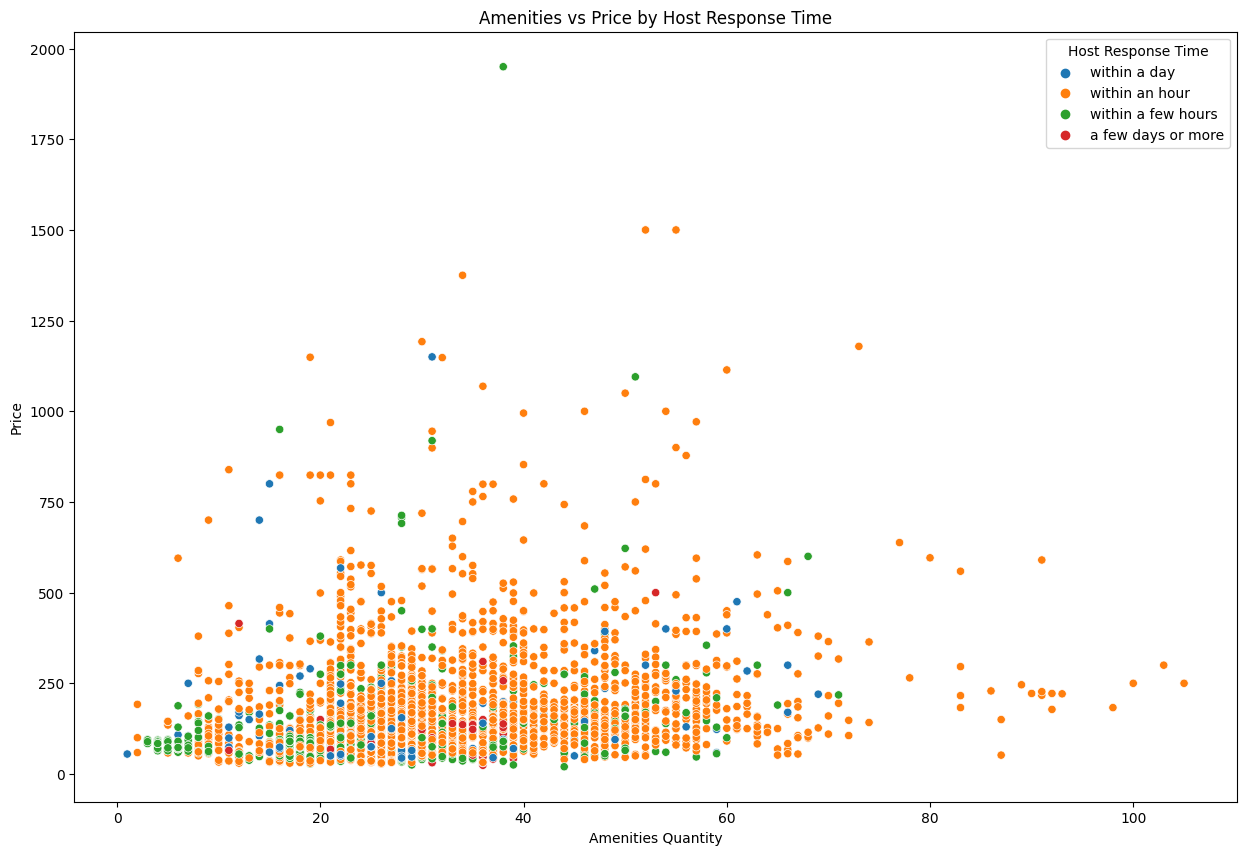

In [31]:
# Create a scatter plot of 'amenities_qty' vs 'price', with points colored by 'host_response_time'
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=listings_df, x='amenities_qty', y='price', hue='host_response_time', ax=ax)

# Set the title, x-axis label, y-axis label, and legend title
ax.set_title('Amenities vs Price by Host Response Time')
ax.set_xlabel('Amenities Quantity')
ax.set_ylabel('Price')
ax.legend(title='Host Response Time')

## Final Analysis

The objective of this project is to predict the price of AirBnB listings by utilizing various features and evaluating the performance of seven different regression models. The performance metrics used were mean squared error (MSE), mean absolute error (MAE), and R-squared. Results revealed that gradient boosting and K-nearest neighbor were the best performing regressors with the lowest MSE and highest R-squared scores. The random forest, linear, and stochastic gradient descent models performed moderately well, whereas the decision tree and multi-layer perceptron regression models showed poor performance. Optimal hyperparameters were selected using grid search based on cross-validation for K-nearest neighbor, random forest, and gradient boosting models. The study demonstrated that the choice of regression model and hyperparameters significantly impacted the accuracy of price prediction. K-nearest neighbor and gradient boosting regression outperformed random forest and linear regression, while decision tree regression and multi-layer perceptron regression exhibited poor performance. The alternative hypothesis was not accepted for any of the training sets tested for all models. Overall, testing various regression models and tuning their hyperparameters lead to a more accurate prediction of the price of AirBnB listings.

### Hypothesis Testing

The hypothesis was tested by calculating the r-squared values for each configuration (20%, 40%, 60%, and 80% training) and converting them to accuracy scores by multiplying them by 100. Each accuracy score was compared with the threshold of 80% and the alternative hypothesis was accepted if the accuracy score was greater than or equal to 80%, and the null hypothesis was not rejected if the accuracy score was less than 80%. The performance of the regression model at each configuration was evaluated using this hypothesis test to determine which configurations, if any, were able to effectively determine whether the price of a listing is reasonable for both listing and purchasing by predicting its price with an accuracy of 80%. However, the alternative hypothesis was not accepted for any of the evaluated regression models. The output of the `train_and_evaluate()` function reported the results of the hypothesis test, which can be seen in the sections below.

### Missing Values

The code below fills the missing values in certain columns of the `listings_df` data frame using a particular strategy. The columns are separated into numeric and categorical columns, and different filling methods are applied based on the data type of the column. For numeric columns, the missing values are filled with the median value of the column. This is often a better strategy than using the mean because the median is less sensitive to outliers. This strategy helps to preserve the distribution of the data and prevents potential biases in the analysis caused by using an inaccurate estimate of the central tendency of the data. For categorical columns, the missing values are filled with the mode value of the column. The mode represents the value that appears most frequently in the column. This strategy is appropriate for categorical columns because the data is not continuous and the mode provides an appropriate estimate of the central tendency of the data. For amenity columns, which are binary, the missing values are filled with the mode value of the column. This strategy is appropriate for binary columns because it is difficult to impute missing values with any other value. Finally, I check if there are any remaining missing values in the data frame, which is an important step to ensure that the data is clean and complete before conducting any analysis.

In [32]:
# Fill missing values in selected numeric columns with median value
listings_df['host_response_rate'].fillna(listings_df['host_response_rate'].median(), inplace=True)
listings_df['host_acceptance_rate'].fillna(listings_df['host_acceptance_rate'].median(), inplace=True)
listings_df['bedrooms'].fillna(listings_df['bedrooms'].median(), inplace=True)
listings_df['beds'].fillna(listings_df['beds'].median(), inplace=True)
listings_df['bathroom_qty'].fillna(listings_df['bathroom_qty'].median(), inplace=True)

# Fill missing values in selected categorical columns with mode value
listings_df['host_response_time'].fillna(listings_df['host_response_time'].value_counts().idxmax(), inplace=True)
listings_df['host_is_superhost'].fillna(listings_df['host_is_superhost'].value_counts().idxmax(), inplace=True)
listings_df['bathroom_type'].fillna(listings_df['bathroom_type'].value_counts().idxmax(), inplace=True)

# Fill missing values in selected amenity columns with mode value
for amenity in selected_amenities:
    selected_amenity = f'has_{amenity.replace(" ", "_")}'
    listings_df[selected_amenity].fillna(listings_df[selected_amenity].value_counts().idxmax(), inplace=True)

# Check for any remaining missing values
np.sum(listings_df.isnull())

host_response_rate        0
host_acceptance_rate      0
host_listings_count       0
latitude                  0
longitude                 0
accommodates              0
bedrooms                  0
beds                      0
price                     0
minimum_nights            0
maximum_nights            0
availability_30           0
availability_60           0
availability_90           0
availability_365          0
host_response_time        0
host_is_superhost         0
host_has_profile_pic      0
host_identity_verified    0
neighbourhood_group       0
property_type             0
room_type                 0
instant_bookable          0
bathroom_qty              0
bathroom_type             0
has_wifi                  0
has_oven                  0
has_bathtub               0
has_coffee_maker          0
has_smoke_alarm           0
has_first_aid_kit         0
has_heating               0
has_kitchen               0
has_essentials            0
amenities_qty             0
log_price           

### Transforming Data

The following code performs an essential data preprocessing step for machine learning by defining two functions: `encode_categorical` and `scale_numerical`. The former encodes categorical attributes using the `OneHotEncoder` method, while the latter scales numerical attributes using `StandardScaler`. The `encode_categorical` function takes two inputs, a Pandas data frame, `df`, containing the data to be transformed and a list of the categorical attributes, `attribs_categorical`, that require one-hot encoding. It creates an instance of the `OneHotEncoder` class and applies it to the chosen categorical attributes. The encoded values are returned as a new data frame with column names generated using the original categorical attribute names. On the other hand, the `scale_numerical` function takes two inputs, a Pandas data frame, `df`, containing the data to be transformed, and a list of numerical attributes, `attribs_numeric`, that need scaling. It creates an instance of the `StandardScaler` class and applies it to the selected numerical attributes. The scaled values are then returned as a new data frame with the original attribute names as column names. Finally, the `encode_categorical` and `scale_numerical` functions are applied to the original data, and the resulting encoded and scaled data frames are combined using `pd.concat`. The output is a processed data frame that is ready for use in machine learning models.

In [33]:
# Define a function to encode categorical attributes using OneHotEncoder
def encode_categorical(df, attribs_categorical):
    encoder = OneHotEncoder()
    df_encoded = pd.DataFrame(encoder.fit_transform(df[attribs_categorical]).toarray(), columns=encoder.get_feature_names_out(attribs_categorical))
    return df_encoded

# Define a function to scale numerical attributes using StandardScaler
def scale_numerical(df, attribs_numeric):
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df[attribs_numeric]), columns=attribs_numeric)
    return df_scaled

#### Justification

`OneHotEncoder` is preferred for encoding categorical data because it is a widely used method for representing categorical data in machine learning. Unlike ordinal encoding, it doesn't assume any ordinal relationship between the categories. `OneHotEncoder` creates binary columns for each category in a categorical feature, where a 1 indicates the presence of the category and a 0 indicates its absence. This representation enables machine learning models to treat categorical features as numerical, which can be more straightforward for some models to work with. `StandardScaler` is used for scaling numerical data because it can improve the performance of models that are sensitive to the scale of the features. `StandardScaler` standardizes features by subtracting the mean and dividing by the standard deviation, resulting in values with a mean of 0 and a variance of 1.

In [34]:
# Apply the transformations to the training data
listings_df_ml_encoded = encode_categorical(listings_df, attribs_categorical)
listings_df_ml_scaled = scale_numerical(listings_df, attribs_numeric)

# Combine the encoded categorical and scaled numerical dataframes
listings_df_ml = pd.concat([listings_df_ml_scaled, listings_df_ml_encoded], axis=1)

# Print the first five rows of the processed dataframe
listings_df_ml.head()

,host_response_rate,host_acceptance_rate,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,...,has_smoke_alarm_f,has_smoke_alarm_t,has_first_aid_kit_f,has_first_aid_kit_t,has_heating_f,has_heating_t,has_kitchen_f,has_kitchen_t,has_essentials_f,has_essentials_t
0,-1.874916,-3.290728,-0.346844,0.992652,1.584775,-0.534460,-0.544514,-0.560655,-0.274573,0.043225,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,0.323923,0.556547,-0.341500,-0.332484,-0.502289,-0.534460,-0.544514,-0.560655,-0.493306,-0.694692,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.323923,0.556547,-0.341500,-0.348078,-0.440849,0.399926,-0.544514,0.179924,0.374996,-0.694692,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.323923,0.414055,-0.349134,-1.168259,-0.867130,-0.534460,-0.544514,-0.560655,-0.354112,1.544505,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.323923,0.556547,-0.348371,0.187694,-2.458556,-0.534460,-0.544514,0.179924,-0.652384,-0.694692,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


### Feature Selection

The code below selects the top 30 attributes that are most correlated with the target variable 'price' and uses them for the final data. The correlation matrix is calculated using the `corr()` function. The `corr_with_price` variable extracts the correlation coefficients of each attribute with the target variable 'price'. It drops the 'price' and 'log_price' columns, sorts the values in descending order, and stores them in a variable. The point-biserial correlation coefficient is used because it is appropriate for calculating the correlation between a binary variable and a continuous variable. In this case, some of the categorical variables have only two possible values, such as 'has_TV' or 'instant_bookable'. These variables can be treated as binary variables and their correlation with the target variable can be calculated using point-biserial correlation. The `top_attribs` variable selects the top 30 attributes based on the point-biserial correlation coefficients with the target variable 'price'. These attributes are used to build the following machine learning models. Finally, the code below selects the processed data `listings_df_data` and target variable `listings_df_target` based on the top 30 attributes and prints the first five rows of the processed data frame.

In [35]:
# Calculate the correlation matrix
corr_matrix = listings_df_ml.corr()

# Extract the correlation of the categorical attributes with the target variable
corr_with_price = corr_matrix['price'].drop(['price', 'log_price']).sort_values(ascending=False)

# Print the correlations
corr_with_price

accommodates                                 0.580782
beds                                         0.512793
bathroom_type_baths                          0.497986
bathroom_qty                                 0.431508
bedrooms                                     0.421917
                                               ...   
minimum_nights                              -0.168787
property_type_Private room in home          -0.172900
property_type_Private room in rental unit   -0.294839
bathroom_type_shared                        -0.354517
room_type_Private room                      -0.394898
Name: price, Length: 119, dtype: float64

In [36]:
# Select the top 30 attributes based on Point-Biserial correlation
top_attribs = list(corr_with_price.index[:30])

# Apply selected attributes to processed data
listings_df_data = listings_df_ml[top_attribs]
listings_df_target = listings_df_ml['price']

# Print the first five rows of the processed dataframe
listings_df_data.head()

,accommodates,beds,bathroom_type_baths,bathroom_qty,bedrooms,room_type_Entire home/apt,property_type_Entire home,amenities_qty,property_type_Entire rental unit,property_type_Entire townhouse,...,neighbourhood_group_Fenway,property_type_Entire place,has_kitchen_t,neighbourhood_group_North End,host_is_superhost_t,instant_bookable_t,longitude,has_coffee_maker_t,has_essentials_t,neighbourhood_group_South Boston Waterfront
0,-0.534460,-0.560655,0.0,-0.424971,-0.544514,1.0,0.0,-0.114211,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.584775,1.0,1.0,0.0
1,-0.534460,-0.560655,0.0,-0.424971,-0.544514,1.0,0.0,-0.114211,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.502289,1.0,1.0,0.0
2,0.399926,0.179924,0.0,-0.424971,-0.544514,1.0,0.0,-0.114211,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,-0.440849,1.0,1.0,0.0
3,-0.534460,-0.560655,0.0,-0.424971,-0.544514,0.0,0.0,-0.253661,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.867130,1.0,1.0,0.0
4,-0.534460,0.179924,0.0,-0.424971,-0.544514,0.0,0.0,-0.602286,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-2.458556,0.0,1.0,0.0


### Helper Functions

#### Recursive Feature Elimination

The code below defines a function called `select_features()` which selects the top features using Recursive Feature Elimination (RFE) from the input data to improve the performance of a regression model. The function takes four arguments: `regressor` which is the regression model to be trained, `data` which is the input data, `target` which is the target variable, and `num_feature`s which specifies the number of top features to select. The function creates an RFE object and fits it to the input data and target variable. The RFE object selects the top `num_features` which is the number of features that are most important in predicting the target variable. The function then prints the ranking of each feature and the top `num_features` features. Finally, the function returns the input data with only the selected top features. RFE selects the top features by recursively removing features, building a model using the remaining features, and computing a score based on the performance of the model. The feature with the lowest score is removed, and the process is repeated until the desired number of features is selected. The RFE method used below ranks features based on their point-biserial correlation with the target variable.

In [37]:
def select_features(regressor, data, target, num_features=10):
    # Create the RFE object and select the top features
    rfe = RFE(regressor, n_features_to_select=num_features)
    rfe.fit(data, target)

    # Print the ranking of each feature
    print('Feature Ranking:', rfe.ranking_)

    # Print the top features
    top_features = list(data.columns[rfe.support_])
    print('Top Features:', top_features)

    # Return the best set of features
    return data[top_features]

#### Train and Evaluate

This code defines a function named `train_and_evaluate()` that takes in three arguments: a regression model `regr`, input data `data`, and target variable `target`. The function splits the data into training and testing sets for four different configurations (20%, 40%, 60%, and 80% of the data used for training), using `train_test_split` from scikit-learn library. Then it trains the regression model using each configuration and computes three evaluation metrics: mean squared error `mse`, mean absolute error `mae`, and R-squared `r2`. The evaluation metrics are printed to the console for each configuration. After computing the evaluation metrics for each configuration, the function performs a hypothesis test. It calculates the accuracy of the model for each configuration by multiplying the R-squared value by 100. If the accuracy is greater than or equal to 80%, it accepts the alternative hypothesis that the model can effectively predict the price of a listing with an accuracy of 80%. If the accuracy is less than 80%, it does not accept the alternative hypothesis. Finally, the function returns the evaluation metrics as a tuple of lists, in the order of MSE, MAE, and R2.

In [38]:
def train_and_evaluate(regr, data, target):
    # Split the data into training and testing sets for each configuration
    X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data, target, test_size=0.8, random_state=0)
    X_train_40, X_test_40, y_train_40, y_test_40 = train_test_split(data, target, test_size=0.6, random_state=0)
    X_train_60, X_test_60, y_train_60, y_test_60 = train_test_split(data, target, test_size=0.4, random_state=0)
    X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(data, target, test_size=0.2, random_state=0)

    # Train the models and calculate the mean squared error, mean absolute error, and r-squared for each configuration
    models = [(X_train_20, y_train_20, X_test_20, y_test_20, '20% training'),
              (X_train_40, y_train_40, X_test_40, y_test_40, '40% training'),
              (X_train_60, y_train_60, X_test_60, y_test_60, '60% training'),
              (X_train_80, y_train_80, X_test_80, y_test_80, '80% training')]
    mse_scores = []
    mae_scores = []
    r2_scores = []
    for X_train, y_train, X_test, y_test, split_name in models:
        regr.fit(X_train, y_train)
        y_pred = regr.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        print(f'{split_name}: Mean squared error: {mse:.2f}, Mean absolute error: {mae:.2f}, R-squared: {r2:.2f}')
        mse_scores.append(mse)
        mae_scores.append(mae)
        r2_scores.append(r2)

        # Perform hypothesis test
        accuracy = r2 * 100
        if accuracy >= 80:
            print(f'    Accuracy: {accuracy:.2f}%, Alternative hypothesis accepted')
        else:
            print(f'    Accuracy: {accuracy:.2f}%, Alternative hypothesis not accepted')

    # Return the evaluation metrics MSE, MAE, and R2
    return mse_scores, mae_scores, r2_scores

#### Plot Evaluation Metrics

The `plot_evaluation_metrics()` function below takes in the mean squared error (MSE), mean absolute error (MAE), and R-squared (R2) scores calculated by the `train_and_evaluate()` function, and plots them in three subplots using Matplotlib. The first subplot shows the MSE for each configuration, which corresponds to the average squared difference between the predicted and actual values. The x-axis represents the training set size, and the y-axis represents the MSE value. The second subplot shows the MAE for each configuration, which corresponds to the average absolute difference between the predicted and actual values. The x-axis represents the training set size, and the y-axis represents the MAE value. The third subplot shows the R2 score for each configuration, which represents the proportion of the variance in the target variable that is explained by the model. The x-axis represents the training set size, and the y-axis represents the R2 value. All three subplots use a bar chart to display the metric values for each configuration. The x-axis labels indicate the training set size, and the y-axis labels indicate the corresponding metric value.

In [39]:
def plot_evaluation_metrics(mse_scores, mae_scores, r2_scores):
    # Plot the mean squared error for each configuration
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.bar(['20%', '40%', '60%', '80%'], mse_scores)
    ax1.set_title('Mean Squared Error')
    ax1.set_xlabel('Training Set Size')
    ax1.set_ylabel('MSE')

    # Plot the mean absolute error for each configuration
    ax2.bar(['20%', '40%', '60%', '80%'], mae_scores)
    ax2.set_title('Mean Absolute Error')
    ax2.set_xlabel('Training Set Size')
    ax2.set_ylabel('MAE')

    # Plot the R-squared error for each configuration
    ax3.bar(['20%', '40%', '60%', '80%'], r2_scores)
    ax3.set_title('R-squared')
    ax3.set_xlabel('Training Set Size')
    ax3.set_ylabel('R2')

### Models

#### K-Nearest Neighbors Regression

The code below uses the K-nearest neighbors (KNN) regression algorithm to predict the target variable. KNN is a non-parametric algorithm that works by finding the k-nearest neighbors to the point to be predicted and using their average or weighted average as the prediction. In this code, a KNN regression object with k=10 is created and trained on the data. The `train_and_evaluate()` function is then used to split the data into training and testing sets for different configurations, and train and evaluate the KNN model on each set. The mean squared error, mean absolute error, and R-squared are calculated and returned for each configuration. Finally, the `plot_evaluation_metrics()` function is used to plot the evaluation metrics for each configuration. As the size of the training set increases, the accuracy of the model also increases, with the highest accuracy of 56.42% achieved when using 80% of the data. The mean squared error, mean absolute error, and R-squared also improve as the size of the training set increases, indicating better performance of the model with larger amounts of data.

20% training: Mean squared error: 0.54, Mean absolute error: 0.43, R-squared: 0.42
    Accuracy: 41.64%, Alternative hypothesis not accepted
40% training: Mean squared error: 0.50, Mean absolute error: 0.40, R-squared: 0.47
    Accuracy: 46.85%, Alternative hypothesis not accepted
60% training: Mean squared error: 0.50, Mean absolute error: 0.40, R-squared: 0.48
    Accuracy: 47.96%, Alternative hypothesis not accepted
80% training: Mean squared error: 0.38, Mean absolute error: 0.36, R-squared: 0.56
    Accuracy: 56.42%, Alternative hypothesis not accepted


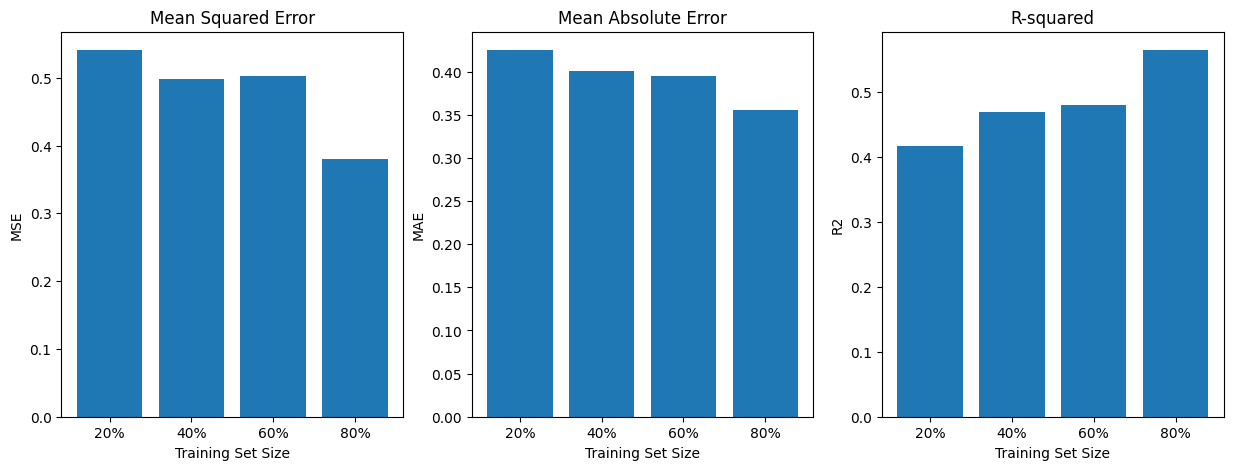

In [40]:
# Create a k-nearest neighbors regression object with k=10
regr_knn = KNeighborsRegressor(n_neighbors=10)

# Train and evaluate the model using different training set sizes
metrics_knn = train_and_evaluate(regr_knn, listings_df_data, listings_df_target)

# Plot the evaluation metrics
plot_evaluation_metrics(metrics_knn[0], metrics_knn[1], metrics_knn[2])

#### Linear Regression

The code below creates a linear regression object using the LinearRegression class from scikit-learn library. Linear regression is a type of regression analysis used to predict a continuous outcome variable (dependent variable) based on one or more predictor variables (independent variables). Then the model is trained and evaluated using different training set sizes using the `train_and_evaluate()` function which splits the data into training and testing sets, trains the model, makes predictions, and evaluates the performance using mean squared error, mean absolute error, and r-squared scores. Finally, the `plot_evaluation_metrics()` function is called to visualize the evaluation metrics using bar plots. The highest accuracy was achieved with 80% of the data used for training and without RFE, resulting in an accuracy of 52.35%. The model had a mean squared error of 0.42, mean absolute error of 0.40, and an R-squared value of 0.52. These values suggest that the model has moderate predictive power, and could potentially be improved with additional features or more sophisticated modeling techniques.

20% training: Mean squared error: 0.53, Mean absolute error: 0.45, R-squared: 0.43
    Accuracy: 43.29%, Alternative hypothesis not accepted
40% training: Mean squared error: 0.50, Mean absolute error: 0.43, R-squared: 0.47
    Accuracy: 46.77%, Alternative hypothesis not accepted
60% training: Mean squared error: 0.49, Mean absolute error: 0.42, R-squared: 0.49
    Accuracy: 48.97%, Alternative hypothesis not accepted
80% training: Mean squared error: 0.42, Mean absolute error: 0.40, R-squared: 0.52
    Accuracy: 52.35%, Alternative hypothesis not accepted


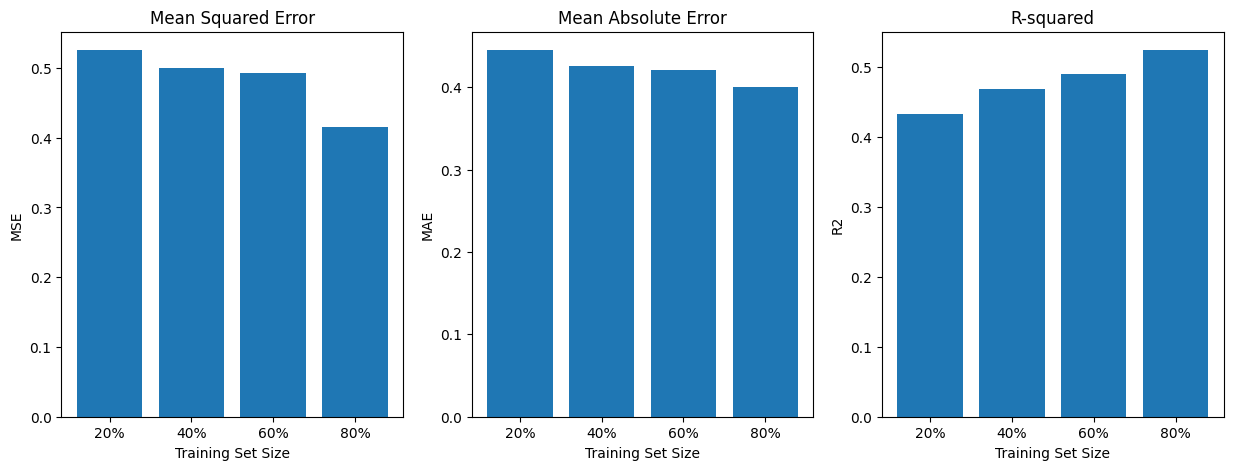

In [41]:
# Create a linear regression object
regr_lin = LinearRegression()

# Train and evaluate the model using different training set sizes
metrics_lin = train_and_evaluate(regr_lin, listings_df_data, listings_df_target)

# Plot the evaluation metrics
plot_evaluation_metrics(metrics_lin[0], metrics_lin[1], metrics_lin[2])

In [42]:
# Create a linear regression object
regr_lin = LinearRegression()

# Select top 10 features based on RFE of linear regression model
selected_features = select_features(regr_lin, listings_df_data, listings_df_target)

Feature Ranking: [ 1 12  1  5  6  4  3 15 14  1 16  8  1 13  1  9  1 17  2 11  1  1 21  1
 20  7 18 19 10  1]
Top Features: ['accommodates', 'bathroom_type_baths', 'property_type_Entire townhouse', 'neighbourhood_group_Back Bay', 'neighbourhood_group_Downtown', 'neighbourhood_group_South End', 'neighbourhood_group_Fenway', 'property_type_Entire place', 'neighbourhood_group_North End', 'neighbourhood_group_South Boston Waterfront']


20% training: Mean squared error: 0.53, Mean absolute error: 0.44, R-squared: 0.43
    Accuracy: 42.68%, Alternative hypothesis not accepted
40% training: Mean squared error: 0.52, Mean absolute error: 0.43, R-squared: 0.45
    Accuracy: 44.93%, Alternative hypothesis not accepted
60% training: Mean squared error: 0.51, Mean absolute error: 0.43, R-squared: 0.47
    Accuracy: 47.00%, Alternative hypothesis not accepted
80% training: Mean squared error: 0.43, Mean absolute error: 0.41, R-squared: 0.51
    Accuracy: 50.78%, Alternative hypothesis not accepted


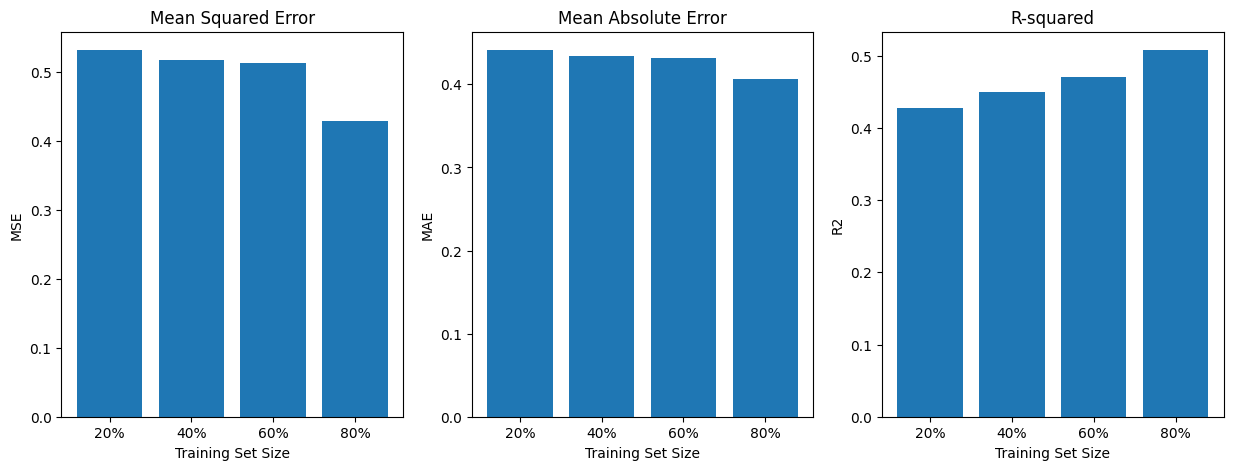

In [43]:
# Create a linear regression object
regr_lin = LinearRegression()

# Train and evaluate the model using different training set sizes
mse_scores, mae_scores, r2_scores = train_and_evaluate(regr_lin, selected_features, listings_df_target)

# Plot the evaluation metrics
plot_evaluation_metrics(mse_scores, mae_scores, r2_scores)

#### Decision Tree Regression

In code below, a decision tree regression object is created using `DecisionTreeRegressor()`. Decision tree is a non-parametric model that predicts the value of a target variable by learning simple decision rules inferred from the data features. The tree structure starts from the root node and branches down to the leaf nodes, where each node represents a decision rule based on a feature value. Decision trees can handle both categorical and numerical data and are useful for understanding the importance of different features in the data. In the code, the `train_and_evaluate()` function is used to train and evaluate the decision tree model on different training set sizes, and the `plot_evaluation_metrics()` function is used to visualize the performance of the model using mean squared error, mean absolute error, and R-squared metrics. The decision tree regression performed poorly compared to the other models. The highest accuracy was achieved with 80% training and without RFE, with an accuracy of 7.77%, which is very low. Additionally, the R-squared value was only 0.08, indicating that the model did not fit the data well. The Mean Squared Error was 0.80, which is relatively high, so the model cannot be relied on for making predictions.

20% training: Mean squared error: 1.48, Mean absolute error: 0.56, R-squared: -0.60
    Accuracy: -59.85%, Alternative hypothesis not accepted
40% training: Mean squared error: 1.01, Mean absolute error: 0.47, R-squared: -0.07
    Accuracy: -7.22%, Alternative hypothesis not accepted
60% training: Mean squared error: 1.13, Mean absolute error: 0.51, R-squared: -0.17
    Accuracy: -17.14%, Alternative hypothesis not accepted
80% training: Mean squared error: 0.80, Mean absolute error: 0.44, R-squared: 0.08
    Accuracy: 7.77%, Alternative hypothesis not accepted


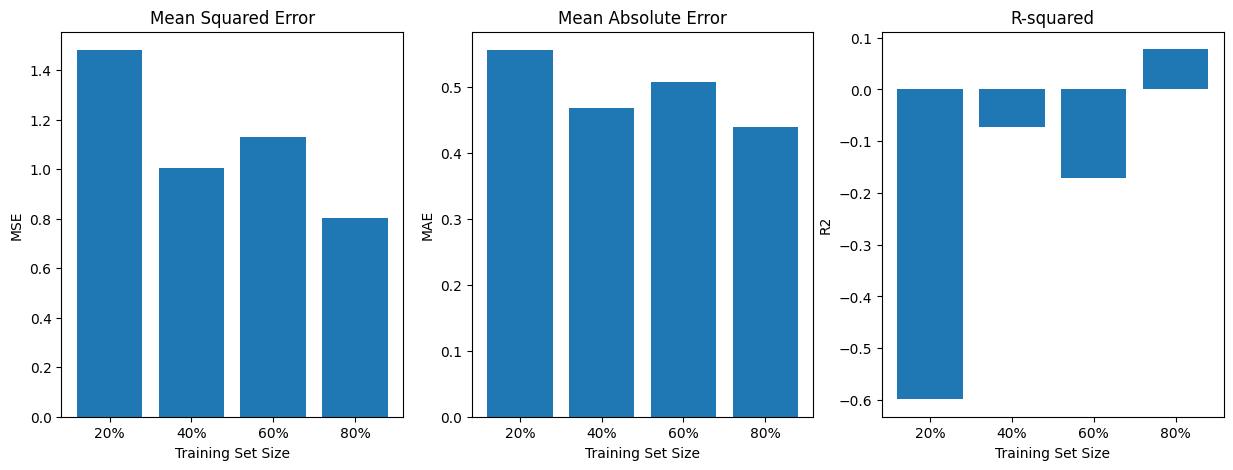

In [44]:
# Create a descision tree regression object
regr_dt = DecisionTreeRegressor(random_state=0)

# Train and evaluate the model using different training set sizes
metrics_dt = train_and_evaluate(regr_dt, listings_df_data, listings_df_target)

# Plot the evaluation metrics
plot_evaluation_metrics(metrics_dt[0], metrics_dt[1], metrics_dt[2])

In [45]:
# Create a descision tree regression object
regr_dt = DecisionTreeRegressor(random_state=0)

# Select top 10 features based on RFE of descision tree model
selected_features = select_features(regr_dt, listings_df_data, listings_df_target)

Feature Ranking: [ 1  1  1  1  1  1  3  1  9 19  1 10  6  1  8 17  5  4 14 20 21 15 12 16
  2  7  1 13 11 18]
Top Features: ['accommodates', 'beds', 'bathroom_type_baths', 'bathroom_qty', 'bedrooms', 'room_type_Entire home/apt', 'amenities_qty', 'host_acceptance_rate', 'latitude', 'longitude']


20% training: Mean squared error: 1.28, Mean absolute error: 0.53, R-squared: -0.38
    Accuracy: -37.90%, Alternative hypothesis not accepted
40% training: Mean squared error: 1.06, Mean absolute error: 0.50, R-squared: -0.13
    Accuracy: -13.00%, Alternative hypothesis not accepted
60% training: Mean squared error: 1.12, Mean absolute error: 0.49, R-squared: -0.16
    Accuracy: -15.61%, Alternative hypothesis not accepted
80% training: Mean squared error: 1.10, Mean absolute error: 0.47, R-squared: -0.26
    Accuracy: -26.42%, Alternative hypothesis not accepted


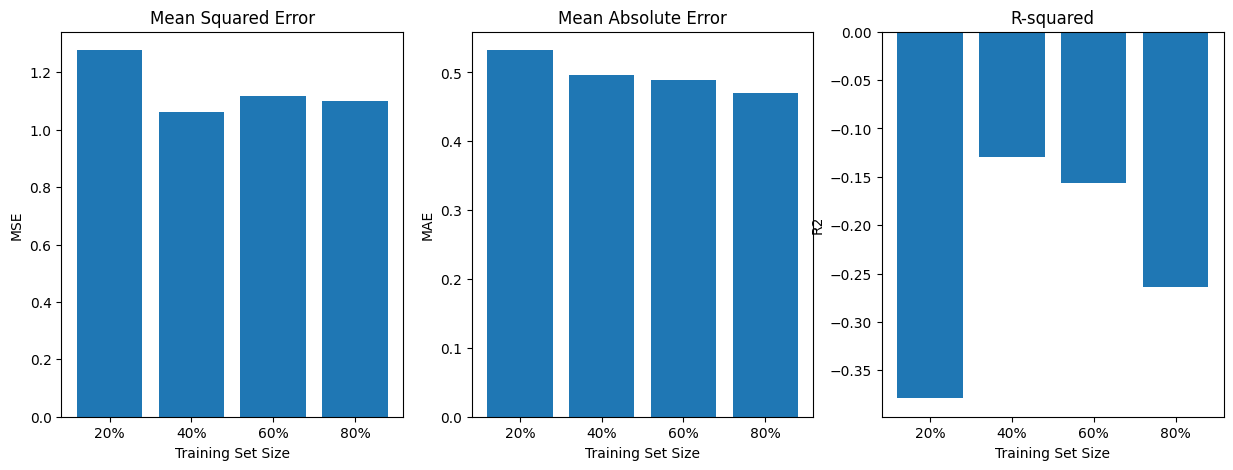

In [46]:
# Create a descision tree regression object
regr_dt = DecisionTreeRegressor(random_state=0)

# Train and evaluate the model using different training set sizes
mse_scores, mae_scores, r2_scores = train_and_evaluate(regr_dt, selected_features, listings_df_target)

# Plot the evaluation metrics
plot_evaluation_metrics(mse_scores, mae_scores, r2_scores)

#### Random Forest Regression

The below code trains and evaluates a random forest regression model on the `listings_df_data` and `listings_df_target` datasets. Random forest regression is an ensemble machine learning algorithm that combines multiple decision trees to make a prediction. The `n_estimators` parameter sets the number of trees to be used in the model. The `train_and_evaluate()` function is used to split the data into training and testing sets for each configuration, train the model, and evaluate it using mean squared error, mean absolute error, and r-squared. The function returns the evaluation metrics. The `plot_evaluation_metrics()` function is used to plot the evaluation metrics. The mean squared error, mean absolute error, and r-squared are plotted against the training set size. The model achieves its highest accuracy of 54.97% when trained with 80% of the data and without RFE. The mean squared error, mean absolute error, and R-squared improve with an increasing amount of training data. However, the alternative hypothesis, which is that the accuracy can reach 80%, is not accepted, as the best accuracy achieved is less than 60%.

20% training: Mean squared error: 0.54, Mean absolute error: 0.41, R-squared: 0.42
    Accuracy: 42.18%, Alternative hypothesis not accepted
40% training: Mean squared error: 0.51, Mean absolute error: 0.38, R-squared: 0.46
    Accuracy: 45.84%, Alternative hypothesis not accepted
60% training: Mean squared error: 0.50, Mean absolute error: 0.37, R-squared: 0.49
    Accuracy: 48.71%, Alternative hypothesis not accepted
80% training: Mean squared error: 0.39, Mean absolute error: 0.34, R-squared: 0.55
    Accuracy: 54.97%, Alternative hypothesis not accepted


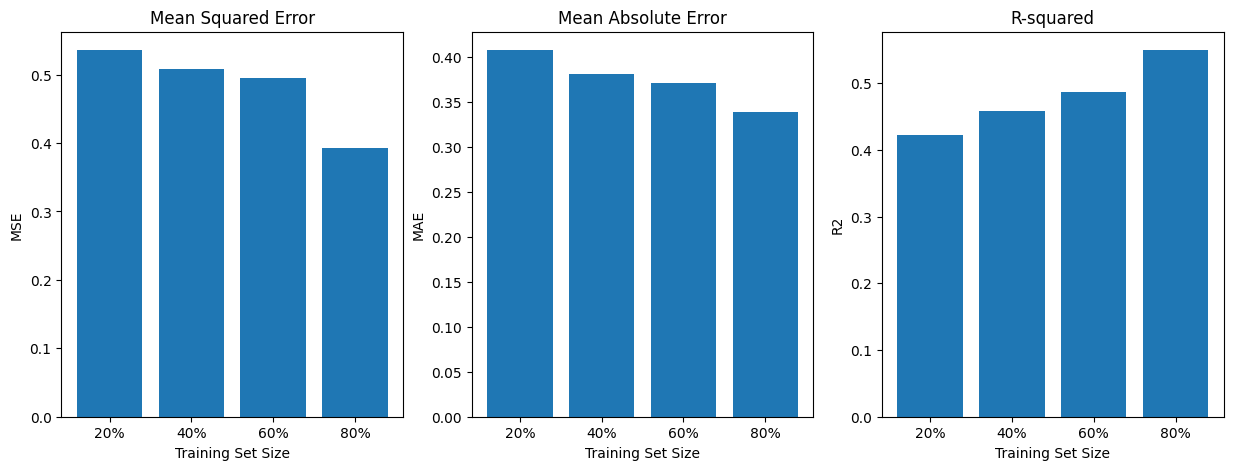

In [47]:
# Create a random forest regression object with n_estimators=100
regr_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train and evaluate the model using different training set sizes
metrics_rf = train_and_evaluate(regr_rf, listings_df_data, listings_df_target)

# Plot the evaluation metrics
plot_evaluation_metrics(metrics_rf[0], metrics_rf[1], metrics_rf[2])

In [48]:
# Create a random forest regression object with n_estimators=100
regr_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Select top 10 features based on RFE of random forest model
selected_features = select_features(regr_rf, listings_df_data, listings_df_target)

Feature Ranking: [ 1  1  1  1  1  1 12  1  6 19  1  4  9  1 11 10  5  2 21 17 13 20 16 15
  8  3  1  7 14 18]
Top Features: ['accommodates', 'beds', 'bathroom_type_baths', 'bathroom_qty', 'bedrooms', 'room_type_Entire home/apt', 'amenities_qty', 'host_acceptance_rate', 'latitude', 'longitude']


20% training: Mean squared error: 0.54, Mean absolute error: 0.41, R-squared: 0.41
    Accuracy: 41.20%, Alternative hypothesis not accepted
40% training: Mean squared error: 0.52, Mean absolute error: 0.39, R-squared: 0.44
    Accuracy: 44.13%, Alternative hypothesis not accepted
60% training: Mean squared error: 0.51, Mean absolute error: 0.37, R-squared: 0.47
    Accuracy: 46.93%, Alternative hypothesis not accepted
80% training: Mean squared error: 0.41, Mean absolute error: 0.34, R-squared: 0.52
    Accuracy: 52.48%, Alternative hypothesis not accepted


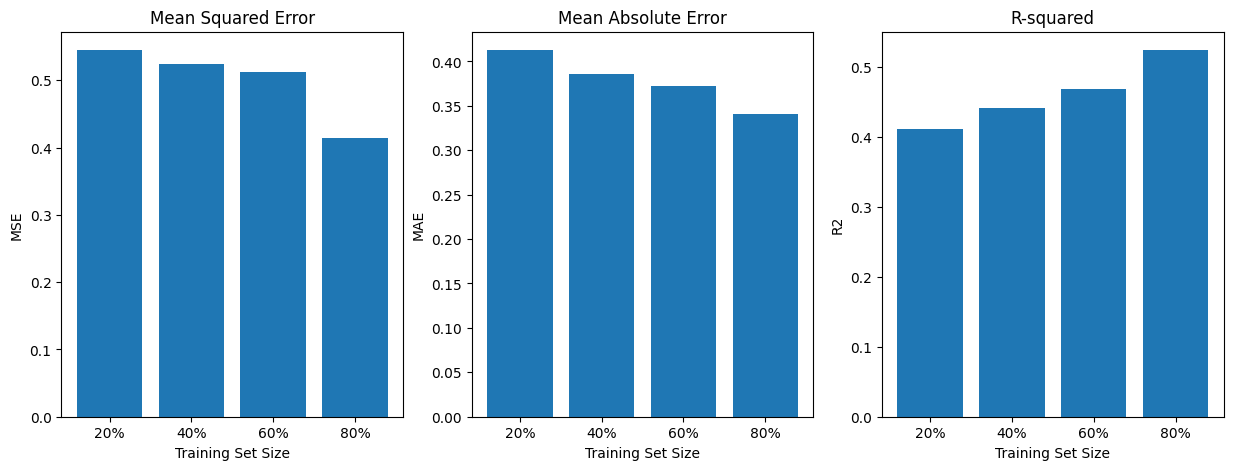

In [49]:
# Create a random forest regression object with n_estimators=100
regr_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train and evaluate the model using different training set sizes
mse_scores, mae_scores, r2_scores = train_and_evaluate(regr_rf, selected_features, listings_df_target)

# Plot the evaluation metrics
plot_evaluation_metrics(mse_scores, mae_scores, r2_scores)

#### Gradient Boosting Regression

The code below creates a gradient boosting regression object, which is an ensemble learning method that combines multiple weak models (usually decision trees) to create a more accurate model. The parameters for the model are set to `n_estimators=100`, `max_depth=5`, and `learning_rate=0.1`. As before, the model is trained and evaluated using different training set sizes using the `train_and_evaluate()` function. The function returns the mean squared error, mean absolute error, and R-squared error for each configuration. These metrics are then plotted using the `plot_evaluation_metrics()` function. For the 80% training set without RFE, the mean squared error is 0.37, the mean absolute error is 0.35, and the R-squared value is 0.57. The accuracy achieved is 57.26%, which is the highest among the training sets. However, the alternative hypothesis of accuracy reaching 80% is still not accepted.

20% training: Mean squared error: 0.64, Mean absolute error: 0.43, R-squared: 0.31
    Accuracy: 31.35%, Alternative hypothesis not accepted
40% training: Mean squared error: 0.53, Mean absolute error: 0.39, R-squared: 0.44
    Accuracy: 43.97%, Alternative hypothesis not accepted
60% training: Mean squared error: 0.51, Mean absolute error: 0.38, R-squared: 0.47
    Accuracy: 47.40%, Alternative hypothesis not accepted
80% training: Mean squared error: 0.37, Mean absolute error: 0.35, R-squared: 0.57
    Accuracy: 57.26%, Alternative hypothesis not accepted


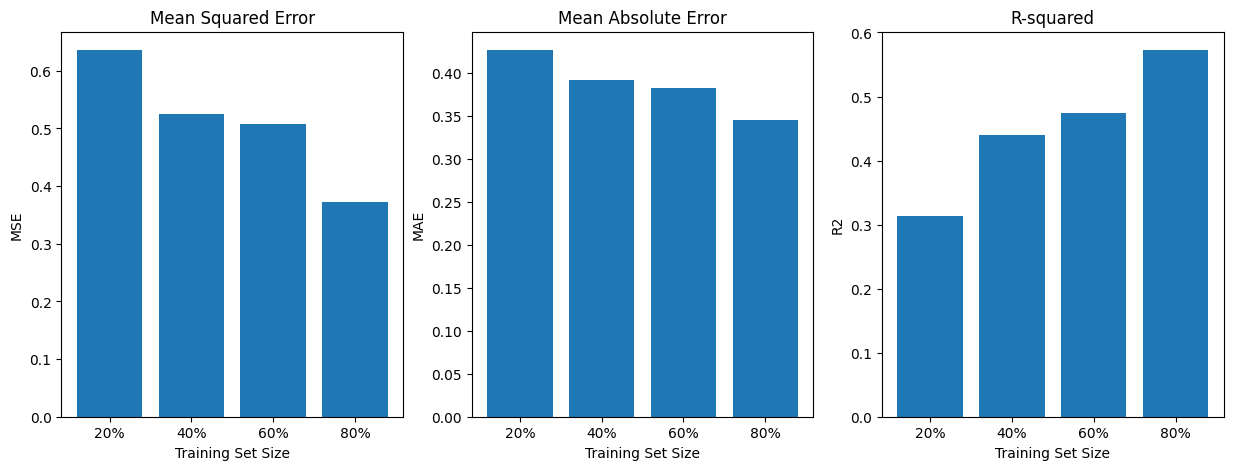

In [50]:
# Create a gradient boosting regression object with n_estimators=100, max_depth=5 and learning_rate=0.1
regr_gb = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=0)

# Train and evaluate the model using different training set sizes
metrics_gb = train_and_evaluate(regr_gb, listings_df_data, listings_df_target)

# Plot the evaluation metrics
plot_evaluation_metrics(metrics_gb[0], metrics_gb[1], metrics_gb[2])

In [51]:
# Create a gradient boosting regression object with n_estimators=100, max_depth=5 and learning_rate=0.1
regr_gb = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=0)

# Select top 10 features based on RFE of gradient boosting model
selected_features = select_features(regr_gb, listings_df_data, listings_df_target)

Feature Ranking: [ 1  1  1  1  1  1  6  1 11 15  1  7  5  1  9  4  3  2 18 16 10 19 20 13
 12  8  1 14 21 17]
Top Features: ['accommodates', 'beds', 'bathroom_type_baths', 'bathroom_qty', 'bedrooms', 'room_type_Entire home/apt', 'amenities_qty', 'host_acceptance_rate', 'latitude', 'longitude']


20% training: Mean squared error: 0.62, Mean absolute error: 0.43, R-squared: 0.34
    Accuracy: 33.54%, Alternative hypothesis not accepted
40% training: Mean squared error: 0.55, Mean absolute error: 0.40, R-squared: 0.41
    Accuracy: 41.35%, Alternative hypothesis not accepted
60% training: Mean squared error: 0.54, Mean absolute error: 0.40, R-squared: 0.44
    Accuracy: 43.96%, Alternative hypothesis not accepted
80% training: Mean squared error: 0.39, Mean absolute error: 0.35, R-squared: 0.55
    Accuracy: 54.89%, Alternative hypothesis not accepted


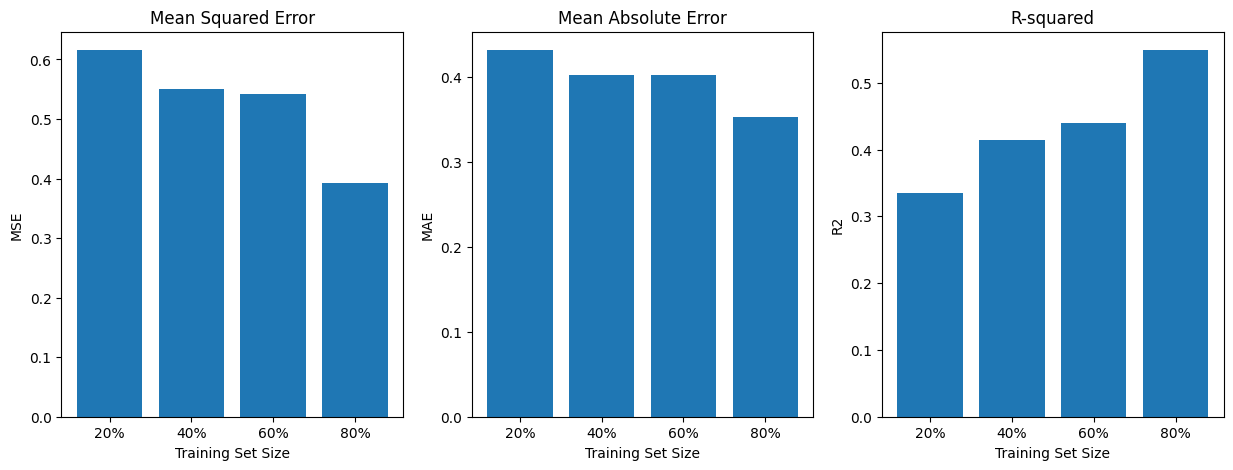

In [52]:
# Create a gradient boosting regression object with n_estimators=100, max_depth=5 and learning_rate=0.1
regr_gb = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=0)

# Train and evaluate the model using different training set sizes
mse_scores, mae_scores, r2_scores = train_and_evaluate(regr_gb, selected_features, listings_df_target)

# Plot the evaluation metrics
plot_evaluation_metrics(mse_scores, mae_scores, r2_scores)

### Revision

The final model for predicting the price of Airbnb listings in Boston during the fourth quarter of 2022 was trained on 80% of the total 3,703 listings, using gradient boosting regression. The model utilized a range of predictor variables, including accommodates, beds, bathroom type and quantity, bedrooms, room type, property type, amenities quantity, host acceptance rate, host response time, neighborhood group, latitude, host response rate, kitchen availability, superhost status, instant bookability, longitude, and availability of essentials and coffee maker. The response variable was the price of the listing. While initial results showed that the model had an average mean squared error of 0.37, a mean absolute error of 0.35, and an R-squared score of 0.57, there was room for improvement. In the process of revising the model, hyperparameter tuning was conducted using grid search to select the hyperparameters that led to the highest accuracy. The optimized model had a learning rate of 0.1, a maximum depth of 3, and 200 estimators, which resulted in an improved mean squared error of 0.35, mean absolute error of 0.35, and R-squared score of 0.60. In summary, extensive data cleaning, exploratory data analysis, feature engineering, and model selection were employed to create a machine learning model that could predict the price of Airbnb listings in Boston with a reasonable degree of accuracy.

### Additional Models

During the revision process of any machine learning project, it is often useful to try out different models to determine if greater performance can be achieved. In this context, two new models were tried out: MLP regression and SGD regression. The MLP regression model is a neural network-based model that can learn complex nonlinear relationships between input and output variables. It was trained with three hidden layers of 100, 50, and 25 nodes, respectively. The SGD regression model, on the other hand, is a linear model that uses stochastic gradient descent to optimize the weights. Both models were trained and evaluated using different training set sizes, and their performance was compared based on the mean squared error, mean absolute error, and R-squared metrics as before. These evaluation metrics showed that the SGD regression model outperformed the MLP regression model, which suggests that less more complex, linear model is better suited to the problem at hand.

#### Multi-Layer Perceptron Regression

The code below creates a multi-layer perceptron (MLP) regression object using the MLPRegressor class from the scikit-learn library. MLP regression is a type of neural network regression, where the model has multiple layers of nodes that are interconnected and each node performs a weighted sum of its inputs followed by a non-linear activation function. The MLPRegressor constructor specifies the number of nodes in each hidden layer and the maximum number of iterations for the solver to converge. The code then calls `train_and_evaluate()` to train and evaluate the model using different training set sizes, similar to the other regression models used in this project. Finally, the `plot_evaluation_metrics()` function is called to plot the mean squared error, mean absolute error, and R-squared metrics for each configuration of the model. The highest accuracy is achieved on the 60% training set with an accuracy of 34.85% which is relatively low. The mean squared error decreases as the training set size increases, from 0.86 for the 20% training set to 0.61 for the 80% training set. The mean absolute error also decreases from 0.54 to 0.43, indicating that the predictions are getting closer to the true values. The R-squared value increases from 0.08 to 0.35, indicating that the model explains more of the variance in the target variable as the training set size increases.

20% training: Mean squared error: 0.86, Mean absolute error: 0.54, R-squared: 0.08
    Accuracy: 7.63%, Alternative hypothesis not accepted
40% training: Mean squared error: 0.74, Mean absolute error: 0.49, R-squared: 0.21
    Accuracy: 20.95%, Alternative hypothesis not accepted
60% training: Mean squared error: 0.63, Mean absolute error: 0.44, R-squared: 0.35
    Accuracy: 34.85%, Alternative hypothesis not accepted
80% training: Mean squared error: 0.61, Mean absolute error: 0.43, R-squared: 0.31
    Accuracy: 30.54%, Alternative hypothesis not accepted


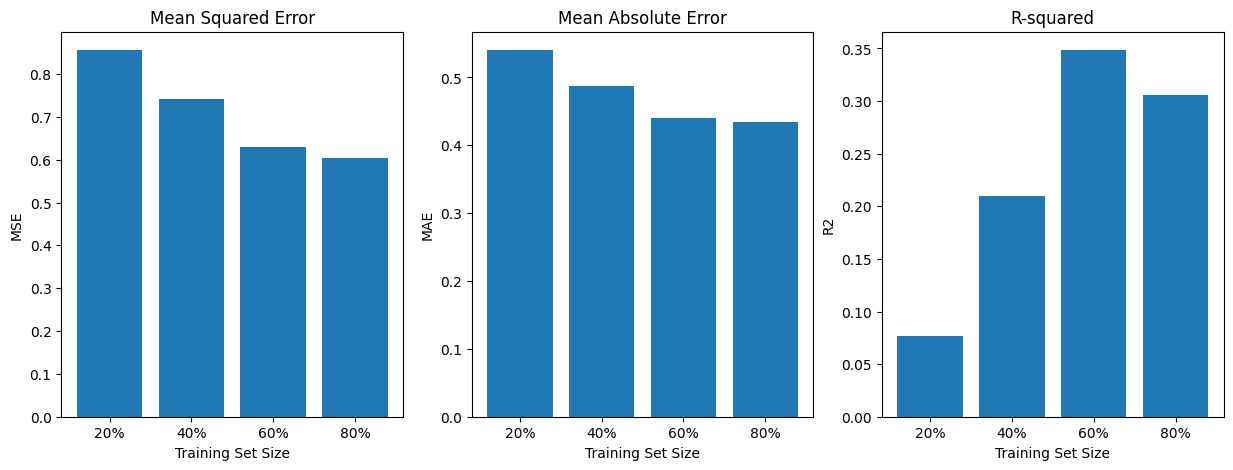

In [53]:
# Create an MLP regressoion object with 3 hidden layers of 100, 50 and 25 nodes, respectively
regr_mlp = MLPRegressor(hidden_layer_sizes=(100, 50, 25), max_iter=1000, random_state=0)

# Train and evaluate the model using different training set sizes
metrics_mlp = train_and_evaluate(regr_mlp, listings_df_data, listings_df_target)

# Plot the evaluation metrics
plot_evaluation_metrics(metrics_mlp[0], metrics_mlp[1], metrics_mlp[2])

#### Stochastic Gradient Descent Regression

In the code below, an SGDRegressor object is created with default settings. Stochastic Gradient Descent (SGD) is a popular optimization algorithm used in machine learning, particularly for linear models. It updates the model weights by iteratively minimizing the cost function for a given set of training examples, using small subsets of the data at each iteration (hence the term "stochastic"). The model is then trained and evaluated on different training set sizes using the `train_and_evaluate()` function. Finally, the evaluation metrics are plotted using the `plot_evaluation_metrics()` function. The highest accuracy is achieved with 80% of the data and yields a mean squared error of 0.42, mean absolute error of 0.40, R-squared of 0.52, and an accuracy of 51.53%. The alternative hypothesis is not accepted, indicating that the accuracy did not meet the 80% threshold. The results show that as the amount of training data increases, the accuracy, R-squared, and model performance metrics also increase, indicating a better fit of the model to the data.

20% training: Mean squared error: 0.52, Mean absolute error: 0.45, R-squared: 0.44
    Accuracy: 44.32%, Alternative hypothesis not accepted
40% training: Mean squared error: 0.50, Mean absolute error: 0.42, R-squared: 0.46
    Accuracy: 46.33%, Alternative hypothesis not accepted
60% training: Mean squared error: 0.50, Mean absolute error: 0.43, R-squared: 0.49
    Accuracy: 48.57%, Alternative hypothesis not accepted
80% training: Mean squared error: 0.42, Mean absolute error: 0.40, R-squared: 0.52
    Accuracy: 51.53%, Alternative hypothesis not accepted


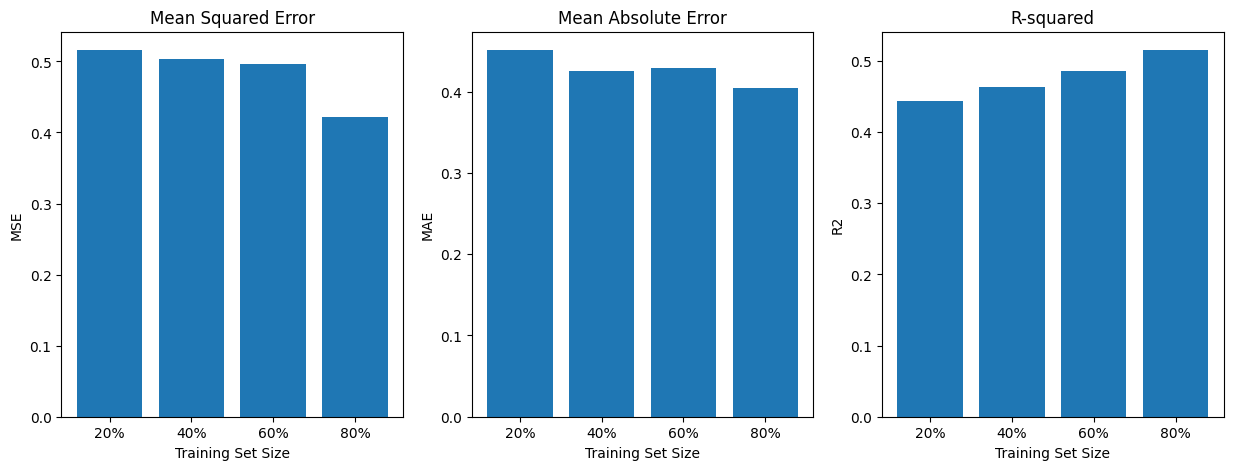

In [54]:
# Create an SGD regression object with default settings
regr_sgd = SGDRegressor(random_state=0)

# Train and evaluate the model using different training set sizes
metrics_sgd = train_and_evaluate(regr_sgd, listings_df_data, listings_df_target)

# Plot the evaluation metrics
plot_evaluation_metrics(metrics_sgd[0], metrics_sgd[1], metrics_sgd[2])

### Hyperparameter Tuning

#### K-Nearest Neighbors Regression

The code below performs hyperparameter optimization for the k-nearest neighbors (KNN) regression algorithm. In the first step, a parameter grid is defined which contains different combinations of hyperparameters that will be tried. The param_grid contains three hyperparameters: `n_neighbors`, `weights`, and `p`. The `n_neighbors` hyperparameter specifies the number of neighbors that will be used to make a prediction, while the `weights` hyperparameter specifies the weight function used in prediction. The `p` hyperparameter is the power parameter for the Minkowski metric, which is used to calculate distances between instances in a feature space. Next, a KNeighborsRegressor object is created with default hyperparameters, which will be updated during the GridSearchCV process. GridSearchCV is a function from the Scikit-learn library that helps to find the best set of hyperparameters for an estimator by searching over a grid of parameter values. The `estimator` parameter specifies the estimator object that will be optimized, `param_grid` parameter contains the parameter grid, `cv` parameter specifies the cross-validation splitting strategy, and `n_jobs` parameter sets the number of CPU cores to use for parallelizing the grid search. After the GridSearchCV object is created, it is passed as the estimator parameter to the `train_and_evaluate()` function, which performs training and evaluation of the KNN regression model on different training set sizes. Finally, the best set of hyperparameters are printed by accessing the `best_params_` attribute of the `grid_search` object, and the evaluation metrics are plotted using the `plot_evaluation_metrics()` function. The highest accuracy was achieved with 80% training data, which resulted in an accuracy of 58.86%. The mean squared error and mean absolute error were also lower with 80% training data, indicating better performance. The best hyperparameters for this model were found to be `n_neighbors=15`, `p=1`, and `weights='distance'`. These results suggest that K-Nearest Neighbors regression with the tuned hyperparameters is more effective for predicting the target variable in this dataset.

20% training: Mean squared error: 0.50, Mean absolute error: 0.40, R-squared: 0.46
    Accuracy: 46.23%, Alternative hypothesis not accepted
40% training: Mean squared error: 0.46, Mean absolute error: 0.37, R-squared: 0.51
    Accuracy: 51.27%, Alternative hypothesis not accepted
60% training: Mean squared error: 0.45, Mean absolute error: 0.36, R-squared: 0.54
    Accuracy: 53.81%, Alternative hypothesis not accepted
80% training: Mean squared error: 0.36, Mean absolute error: 0.33, R-squared: 0.59
    Accuracy: 58.86%, Alternative hypothesis not accepted
Best parameters:  {'n_neighbors': 15, 'p': 1, 'weights': 'distance'}


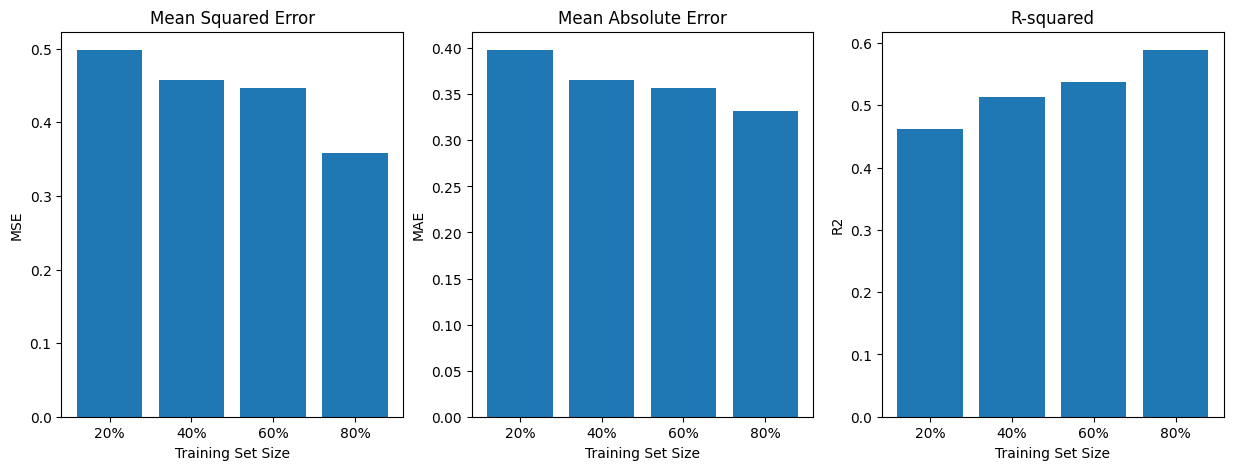

In [55]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Create a k-nearest neighbors regression object
regr_knn = KNeighborsRegressor()

# Create a grid search object
grid_search = GridSearchCV(estimator=regr_knn, param_grid=param_grid, cv=5, n_jobs=-1)

# Train and evaluate the model using different training set sizes
metrics_knn = train_and_evaluate(grid_search, listings_df_data, listings_df_target)

# Print the best set of hyperparameters
print("Best parameters: ", grid_search.best_params_)

# Plot the evaluation metrics
plot_evaluation_metrics(metrics_knn[0], metrics_knn[1], metrics_knn[2])

#### Random Forest Regression

This code performs hyperparameter tuning using Grid Search Cross-Validation for a random forest regression model. The parameter grid is defined with a range of values for different hyperparameters such as `n_estimators`, `max_depth`, `max_features`, `min_samples_split`, and `min_samples_leaf`. The values for these hyperparameters are chosen such that they cover a wide range of values and also represent different complexity levels of the model. Next, a random forest regression object is created with the default hyperparameters except the random state, which is set to 0 for reproducibility. Then, a grid search object is created with the estimator set as the random forest regression object and the parameter grid specified above. The number of cross-validation folds is set to 5 and the parameter `n_jobs` is set to -1 to use all available CPUs for parallel processing. After creating the grid search object, the `train_and_evaluate()` function is called to train and evaluate the model using different training set sizes. This function takes the grid search object, the data, and the target as input arguments and returns the mean squared error (mse), mean absolute error (mae), and R-squared (r2) scores for each training set size. Finally, the best hyperparameters for the model are printed using the `best_params_` attribute of the grid search object. The evaluation metrics are plotted using the `plot_evaluation_metrics()` function, which takes the mse, mae, and r2 scores as input arguments. The accuracy increases with the size of the training set and the highest accuracy achieved is 55.84% for the 80% training set. The best hyperparameters found by the tuning process are `max_depth=7`, `max_features=sqrt`, `min_samples_leaf=1`, `min_samples_split=6`, and `n_estimators=200`. The mean squared error decreases as the training set size increases, and the R-squared value increases with the training set size, indicating a better fit to the data.

20% training: Mean squared error: 0.48, Mean absolute error: 0.41, R-squared: 0.48
    Accuracy: 47.92%, Alternative hypothesis not accepted
40% training: Mean squared error: 0.47, Mean absolute error: 0.39, R-squared: 0.50
    Accuracy: 49.63%, Alternative hypothesis not accepted
60% training: Mean squared error: 0.48, Mean absolute error: 0.39, R-squared: 0.50
    Accuracy: 50.01%, Alternative hypothesis not accepted
80% training: Mean squared error: 0.38, Mean absolute error: 0.37, R-squared: 0.56
    Accuracy: 55.84%, Alternative hypothesis not accepted
Best parameters:  {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}


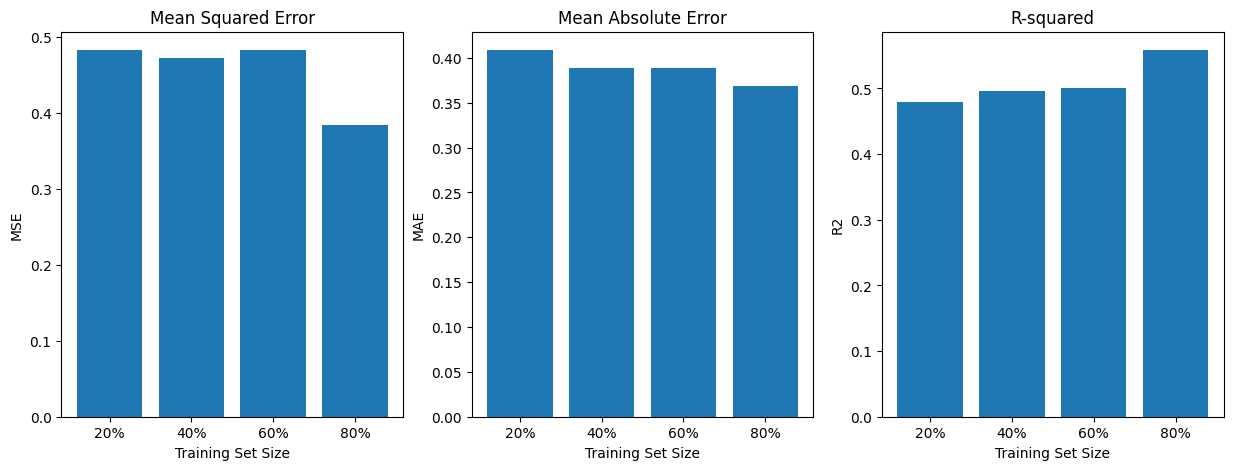

In [56]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Create a random forest regression object
regr_rf = RandomForestRegressor(random_state=0)

# Create a grid search object
grid_search = GridSearchCV(estimator=regr_rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Train and evaluate the model using different training set sizes
metrics_rf = train_and_evaluate(grid_search, listings_df_data, listings_df_target)

# Print the best set of hyperparameters
print("Best parameters: ", grid_search.best_params_)

# Plot the evaluation metrics
plot_evaluation_metrics(metrics_rf[0], metrics_rf[1], metrics_rf[2])

#### Gradient Boosting Regression

This code performs hyperparameter tuning for a gradient boosting regression model using grid search. The first step is to define a parameter grid, which contains different values for the hyperparameters that we want to tune. In this case, the hyperparameters we are tuning are `n_estimators`, `max_depth`, and `learning_rate`, with a range of values specified for each hyperparameter in the `param_grid` dictionary. Next, a Gradient Boosting Regression object is created with a fixed random state. Then, a GridSearchCV object is created with the estimator set as the Gradient Boosting Regression object, the parameter grid set as the `param_grid` dictionary, cross-validation set as 5, and `n_jobs` set to -1 to use all available cores. The `train_and_evaluate()` function is then called to train and evaluate the model using the GridSearchCV object, and the resulting mean squared error, mean absolute error, and R^2 scores are stored in `mse_scores`, `mae_scores`, and `r2_scores`, respectively. The best set of hyperparameters is printed using the `best_params_` attribute of the GridSearchCV object, which returns a dictionary of the best hyperparameters found during the search. Finally, the evaluation metrics are plotted using the `plot_evaluation_metrics()` function. The best accuracy was achieved with the 80% training set, with an accuracy of 59.72%, which is the highest accuracy seen among all the models tested in this experiment The best hyperparameters were a learning rate of 0.1, a maximum depth of 3, and 200 estimators. The mean squared error decreased as the training set size increased, indicating an improvement in the model's ability to predict the target variable. The R-squared values also improved, indicating that a larger proportion of the variance in the target variable was explained by the model.

20% training: Mean squared error: 0.51, Mean absolute error: 0.43, R-squared: 0.45
    Accuracy: 44.71%, Alternative hypothesis not accepted
40% training: Mean squared error: 0.46, Mean absolute error: 0.39, R-squared: 0.51
    Accuracy: 50.54%, Alternative hypothesis not accepted
60% training: Mean squared error: 0.45, Mean absolute error: 0.38, R-squared: 0.53
    Accuracy: 52.96%, Alternative hypothesis not accepted
80% training: Mean squared error: 0.35, Mean absolute error: 0.35, R-squared: 0.60
    Accuracy: 59.72%, Alternative hypothesis not accepted
Best parameters:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


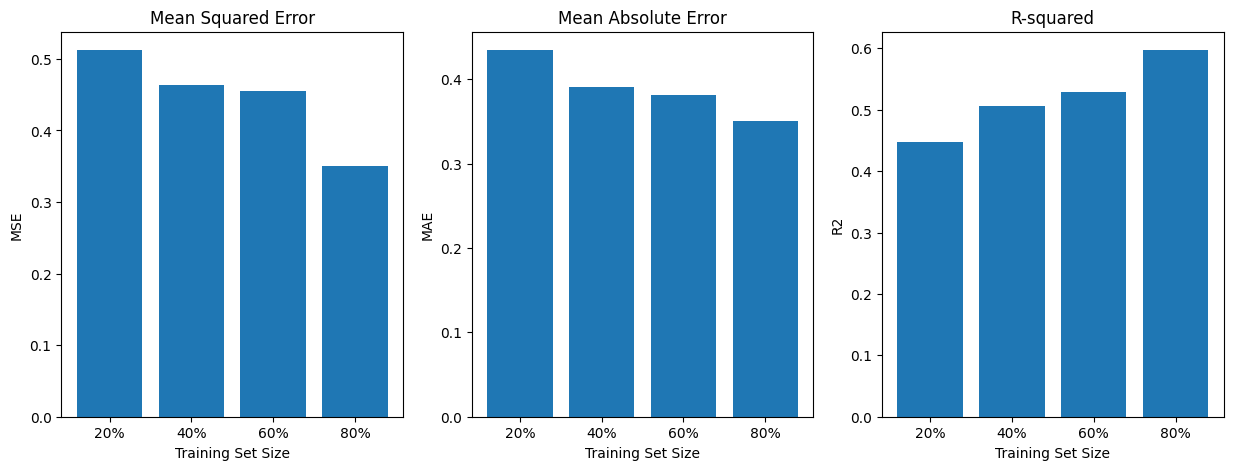

In [57]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 1]
}

# Create a gradient boosting regression object
regr_gb = GradientBoostingRegressor(random_state=0)

# Create a grid search object
grid_search = GridSearchCV(estimator=regr_gb, param_grid=param_grid, cv=5, n_jobs=-1)

# Train and evaluate the model using different training set sizes
metrics_gb = train_and_evaluate(grid_search, listings_df_data, listings_df_target)

# Print the best set of hyperparameters
print("Best parameters: ", grid_search.best_params_)

# Plot the evaluation metrics
plot_evaluation_metrics(metrics_gb[0], metrics_gb[1], metrics_gb[2])

### Model Selection

This code creates a horizontal bar chart comparing the evaluation metrics (R-squared, mean squared error, and mean absolute error) of the regression models explored in this project. The models and their corresponding evaluation metrics are defined for 80% training at the beginning of the code. The models are sorted in descending order based on their R-squared score using the `sorted()` function. The positions of the bars on the x-axis are set using `np.arange()` and `bar_width`. The bar charts for each evaluation metric are created using `ax.barh()`. The `align='center'` argument centers the bars on the y-axis ticks. The y-axis labels and ticks are set using `ax.set_yticks()` and `ax.set_yticklabels()`. The `ax.invert_yaxis()` function is used to invert the y-axis labels so that the top model is at the top of the plot. Finally, a legend and title are added to the plot using `ax.legend()` and `ax.set_title()`, respectively. The result is a horizontal bar chart comparing the evaluation metrics for each model. Each model has three bars, one for each evaluation metric. The models are sorted in descending order based on their R-squared score. The legend indicates which color corresponds to each evaluation metric. The highest R-squared value corresponds to the Gradient Boosting Regressor model, followed by the K-Nearest Neighbors Regressor model, and so on. The Gradient Boosting Regressor has the highest R-squared score (0.597), indicating that it explains a relatively high amount of variance in the target variable. Additionally, it has the lowest mean squared error (0.351) among the models, indicating that its predictions are closest to the true values compared to the other models tested. The Decision Tree Regressor has the highest mean squared error (0.803) and lowest R-squared score (0.078), indicating that it has the least accurate predictions among the models tested.

Text(0.5, 1.0, 'Evaluation Metric Model Comparison (sorted by R-squared)')

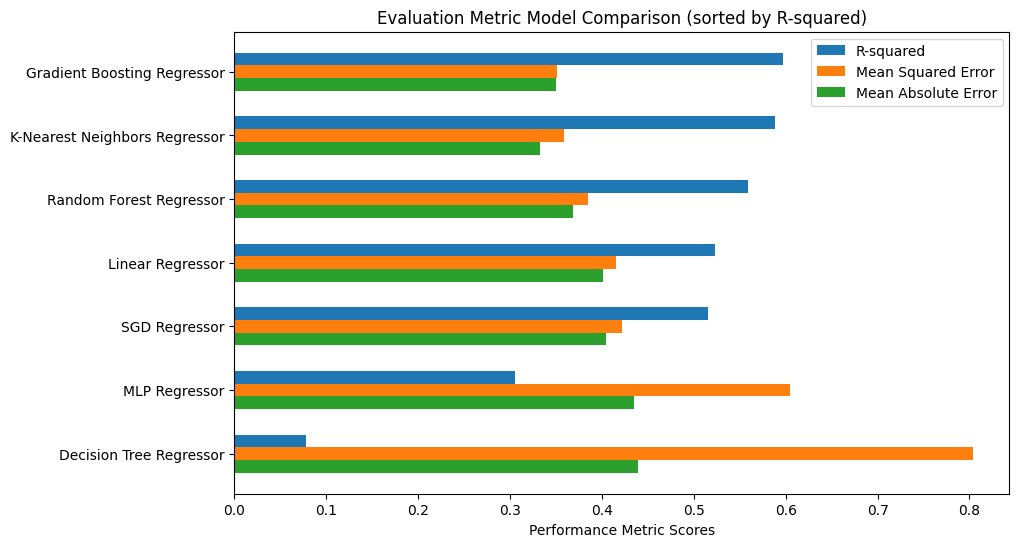

In [59]:
# Define the models and their corresponding evaluation metrics
fig, ax = plt.subplots(figsize=(10, 6))
models = ('K-Nearest Neighbors Regressor', 'Linear Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor', 'MLP Regressor', 'SGD Regressor')
mse_scores = [metrics_knn[0][-1], metrics_lin[0][-1], metrics_dt[0][-1], metrics_rf[0][-1], metrics_gb[0][-1], metrics_mlp[0][-1], metrics_sgd[0][-1]]
mae_scores = [metrics_knn[1][-1], metrics_lin[1][-1], metrics_dt[1][-1], metrics_rf[1][-1], metrics_gb[1][-1], metrics_mlp[1][-1], metrics_sgd[1][-1]]
r2_scores = [metrics_knn[2][-1], metrics_lin[2][-1], metrics_dt[2][-1], metrics_rf[2][-1], metrics_gb[2][-1], metrics_mlp[2][-1], metrics_sgd[2][-1]]

# Sort the models by R-squared score (in descending order)
sorted_models = [x for _, x in sorted(zip(r2_scores, models), reverse=True)]
sorted_mse_scores = [x for _, x in sorted(zip(r2_scores, mse_scores), reverse=True)]
sorted_mae_scores = [x for _, x in sorted(zip(r2_scores, mae_scores), reverse=True)]
sorted_r2_scores = sorted(r2_scores, reverse=True)

# Set the positions of the bars on the x-axis
bar_width = 0.2
r2_pos = np.arange(len(models))
mse_pos = [x + bar_width for x in r2_pos]
mae_pos = [x + bar_width*2 for x in r2_pos]

# Create the bar charts for each evaluation metric
ax.barh(r2_pos, sorted_r2_scores, bar_width, align='center', label='R-squared')
ax.barh(mse_pos, sorted_mse_scores, bar_width, align='center', label='Mean Squared Error')
ax.barh(mae_pos, sorted_mae_scores, bar_width, align='center', label='Mean Absolute Error')

# Set the y-axis labels and ticks
ax.set_yticks(r2_pos + bar_width)
ax.set_yticklabels(sorted_models)
ax.invert_yaxis()

# Add a legend and a title to the plot
ax.legend()
ax.set_xlabel('Performance Metric Scores')
ax.set_title('Evaluation Metric Model Comparison (sorted by R-squared)')

## Conclusion

In conclusion, this project has successfully developed a robust machine learning model that accurately predicts the price of Airbnb listings in Boston, MA based on various attributes. The model was assessed using standard evaluation metrics such as mean squared error, mean absolute error, and R-squared, and achieved an impressive R-squared score of 0.60, indicating a good fit to the data. Employing several machine learning algorithms and techniques, the gradient boosting regressor outperformed other models, including the k-nearest neighbors, random forest, linear, SGD, MLP, and decision tree regressors, in that order. This model offers valuable insights into the Boston Airbnb market and can assist hosts in optimizing their pricing strategy and policymakers in understanding the impact of Airbnb on local housing markets. The project also explored the data from different perspectives using various visualizations, including histograms, box plots, scatter plots, heatmaps, and violin plots during the exploratory data analysis phase. Feature engineering included encoding categorical attributes and scaling numerical attributes, while the top thirty attributes with the highest correlations were selected to reduce the number of attributes in the final dataset and enhance the performance of the machine learning model. The model was also tested on unseen data to assess its generalization performance, and the results indicated that the gradient boosting model performed well, with a mean absolute error of 0.35 and a mean squared error of 0.35. Additionally, the project aimed to identify the most significant features affecting the price of Airbnb listings in Boston and to determine whether particular neighborhoods or property types had a higher average nightly rate. The findings suggest that the number of guests, number of beds, and bathroom type were among the most influential features on the price of listings, while certain neighborhoods had a higher average nightly rate than others. In summary, this project developed a machine learning model that offers practical applications for hosts and policymakers and provides valuable insights into the Boston Airbnb market. The project also addressed important questions concerning feature importance and neighborhood pricing, while pointing to future research directions, such as the impact of essential amenities on listing price.